# 009c. ECONOMIC WORDS IN TWEETS - Sentiment Analysis

### Table of Contents 

- [009c. ECONOMIC WORDS IN TWEETS - Sentiment Analysis](#009c-economic-words-in-tweets-sentiment-analysis)
    - [Table of Contents](#table-of-contents)
  - [Sentiment of Economic Tweets using Bert-based Models](#sentiment-of-economic-tweets-using-bert-based-models)
    - [1. Preparation of data for Sentiment Analysis](#1-preparation-of-data-for-sentiment-analysis)
    - [2. Sentiment Analysis - Bert-based Models](#2-sentiment-analysis-bert-based-models)
    - [3. Loading Sentiment Models Outputs](#3-loading-sentiment-models-outputs)
    - [4. Plotting the results of Sentiments Models](#4-plotting-the-results-of-sentiments-models)
      - [Check of data quality, model quality and model selection](#check-of-data-quality-model-quality-and-model-selection)
      - [Plots:](#plots)
        - [0. After model selection checkout](#0-after-model-selection-checkout)
        - [1. Overall Party Sentiment Proportions](#1-overall-party-sentiment-proportions)
        - [2.1. Party Sentiment by Year](#21-party-sentiment-by-year)
        - [2.2. Party Sentiment before and after the election](#22-party-sentiment-before-and-after-the-election)
        - [3. Plot Overall Sentiment Over Time](#3-plot-overall-sentiment-over-time)
        - [4. Plot Sentiment by Party Over Time with Annotations](#4-plot-sentiment-by-party-over-time-with-annotations)
        - [5. Stacked Area Chart - Overall Sentiment](#5-stacked-area-chart-overall-sentiment)
        - [6.1. Sentiment Distribution for Top Users by Party (# number of tweets)](#61-sentiment-distribution-for-top-users-by-party-number-of-tweets)
        - [6.2. Sentiment Distribution for Top Users by Party (% percentage of tweets)](#62-sentiment-distribution-for-top-users-by-party-percentage-of-tweets)
        - [6.3. Sentiment Distribution for Top Users by Party (Weighted tweets)](#63-sentiment-distribution-for-top-users-by-party-weighted-tweets)
        - [7.1. Positive vs Negative Analysis (Excluding Neutral) by User (# number of tweets)](#71-positive-vs-negative-analysis-excluding-neutral-by-user-number-of-tweets)
        - [7.2. Positive vs Negative Analysis (Excluding Neutral) by User (% percentage of tweets)](#72-positive-vs-negative-analysis-excluding-neutral-by-user-percentage-of-tweets)
        - [7.3. Positive vs Negative Analysis (Excluding Neutral) by User (Weighted tweets)](#73-positive-vs-negative-analysis-excluding-neutral-by-user-weighted-tweets)
        - [8. Percentage Sentiment Change (Before vs. After Election)](#8-percentage-sentiment-change-before-vs-after-election)
        - [9. Net Sentiment Score Over Time](#9-net-sentiment-score-over-time)
        - [10. Sentiment Distribution for Top Keywords](#10-sentiment-distribution-for-top-keywords)
        - [11. Party Sentiment Distribution - Before vs After Election](#11-party-sentiment-distribution-before-vs-after-election)
        - [12. Top Keywords Sentiment Analysis by Party (Heatmap)](#12-top-keywords-sentiment-analysis-by-party-heatmap)
        - [13. Calculate and Plot Percentage Sentiment Change (Before vs After Election)](#13-calculate-and-plot-percentage-sentiment-change-before-vs-after-election)
        - [14. Combined Positive/Negative Before vs After Election](#14-combined-positivenegative-before-vs-after-election)
        - [15. Average Sentiment Score for Top Keywords by Party](#15-average-sentiment-score-for-top-keywords-by-party)


TOC GENERATION

In [62]:
# import sys
# import os

# # Add project root to sys.path
# notebook_dir = os.getcwd() 
# project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
# if project_root not in sys.path:
#     sys.path.insert(0, project_root)

# # Import TOC generator function
# from src.ToC_generator import generate_toc_from_jupyter_notebook

# target_notebook_path = "009c.EconomicWords_sentiment.ipynb" 

# toc_markdown = generate_toc_from_jupyter_notebook(target_notebook_path)

## Sentiment of Economic Tweets using Bert-based Models 

loading data

In [2]:
import pandas as pd
import numpy as np 

import gc 

# Load the Parquet file into a DataFrame
df_clean_translated = pd.read_parquet('../data/05.final/df_final_data.parquet')


# Then correctly convert token columns to lists
token_cols = ['matched_exact_econ_words_naive', 
              'matched_exact_econ_words_regex',
              'matched_exact_econ_words_flashtext', 
              'matched_exact_econ_words_ac',
              'extracted_terms_FILTERED',
              'matched_keywords_FILTERED']

for col in token_cols:
    df_clean_translated[col] = df_clean_translated[col].apply(
        lambda x: x.tolist() if isinstance(x, np.ndarray) else x
    )

def load_economic_words(csv_path):
    # Read the CSV without assuming a header row
    df = pd.read_csv(csv_path, header=None)
    # Convert the first row to a list, dropping any missing values
    words = df.iloc[0].dropna().tolist()
    # Strip extra whitespace from each word
    words = [word.strip() for word in words]
    # Remove the header element if present (e.g., 'economic_words')
    if words and words[0].lower() == 'economic_words':
        words = words[1:]
    return words

# example usage
economic_words = load_economic_words('../data/06.analysis/economic_words.csv')

# economic_words already defined earlier
print("Economic words list:", economic_words)

Economic words list: ['agricultural', 'allowance', 'bank', 'budget', 'consumer', 'credit', 'crisis', 'currency', 'debt', 'demand', 'deregulation', 'development', 'economics', 'economy', 'emissions', 'energy', 'entrepreneurs', 'equalities', 'euro', 'export', 'finance', 'fund', 'gap', 'natural gas', 'highway', 'import', 'inequalities', 'inflation', 'infrastructure', 'industry', 'innovations', 'investment', 'labour', 'macroeconomics', 'market', 'pensions', 'pricey', 'privatization', 'poverty', 'recession', 'savings', 'sector', 'stock market', 'supply', 'taxes', 'trade', 'transition', 'unemployment', 'valorization', 'VAT', 'treasury', 'state-owned companies', 'GDP', 'economic growth', 'economic development', 'economic crisis']


In [3]:
df_clean_translated.columns

Index(['created_at', 'text', 'id', 'author_id', 'edit_controls',
       'possibly_sensitive', 'reply_settings', 'lang',
       'edit_history_tweet_ids', 'conversation_id', 'category', 'attachments',
       'username', 'party', 'in_reply_to_user_id', 'context_annotations',
       'referenced_tweets', 'geo', 'text_clean', 'mentions', 'links',
       'hashtags', 'retweet_count', 'reply_count', 'like_count', 'quote_count',
       'impression_count', 'text_clean_en', 'text_clean_en_demojized',
       'text_clean_demojized', 'emoji_count_en', 'emoji_count', 'name',
       'matched_exact_econ_words_naive', 'has_exact_econ_word_naive',
       'matched_exact_econ_words_regex', 'has_exact_econ_word_regex',
       'matched_exact_econ_words_flashtext', 'has_exact_econ_word_flashtext',
       'matched_exact_econ_words_ac', 'has_exact_econ_word_ac',
       'matched_keywords_ORIG', 'has_econ_term_ORIG',
       'extracted_terms_FILTERED', 'matched_keywords_FILTERED',
       'has_econ_term_FILTERED', '

### 1. Preparation of data for Sentiment Analysis

Cropping data for sentiment analysis

What does this code do?

**Prepares Data (Step 1):**

- Filters tweets that contain economic terms using has_econ_term_FILTERED
- Selects only necessary columns for sentiment analysis
- Normalizes list columns (converts numpy arrays to Python lists)

**Cleans Text Data (Step 2):**

- Removes extra whitespace from text columns
- Trims leading/trailing spaces
- Collapses multiple spaces into single spaces
- This ensures consistent text formatting for sentiment analysis


**Saves Two Versions (Step 3):**

- df_sentiment_input.parquet: Standard version (for compatibility)
- df_sentiment_input_CLEANED.parquet: Cleaned version for external scripts

In [7]:
import pandas as pd
import numpy as np
import os
import re

# ==============================================================================
# INTEGRATED SECTION: Create and Clean df_sentiment_input for Sentiment Analysis
# ==============================================================================
# This code:
# 1. Creates a filtered subset of tweets containing economic terms
# 2. Cleans whitespace from text columns to ensure consistent formatting
# 3. Saves both regular and cleaned versions for different use cases

print("\n" + "="*60)
print("--- Creating and Cleaning df_sentiment_input for Sentiment Analysis ---")
print("="*60)

# Configuration
output_dir = '../data/05.final'
sentiment_input_filename = 'df_sentiment_input.parquet'
sentiment_cleaned_filename = 'df_sentiment_input_CLEANED.parquet'  # For external scripts

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Toggle: Set to True to force recreation even if files exist
force_recreate = False  # Change to True when you want to recreate from scratch

# Define columns to extract
essential_columns = [
    'id',                        # Tweet ID (unique identifier)
    'text_clean_en',            # Cleaned English text
    'text_clean_en_demojized'   # Cleaned English text with emojis converted to text
]

optional_columns = [
    'created_at',                # Timestamp of tweet
    'party', 
    'name',                      # Political party of author
    'username',                  # Username of author
    'matched_keywords_FILTERED', # Economic keywords found in tweet
    'extracted_terms_FILTERED'   # Economic terms extracted from tweet
]

# Columns that need list normalization and text cleaning
list_columns = ['matched_keywords_FILTERED', 'extracted_terms_FILTERED']
text_columns = ['text_clean_en', 'text_clean_en_demojized']  # Columns to clean whitespace

# Helper function to normalize list columns
def normalize_list_column(series):
    """Convert numpy arrays to Python lists, handle NaN values"""
    def convert_element(x):
        if isinstance(x, np.ndarray):
            return x.tolist()
        elif isinstance(x, list):
            return x
        else:
            return []
    return series.apply(convert_element)

# Helper function to clean text whitespace
def clean_text_whitespace(text):
    """Remove extra whitespace from text: trim and collapse multiple spaces"""
    if pd.isna(text):
        return text
    text = str(text).strip()  # Remove leading/trailing whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with single space
    return text

# STEP 1: Create df_sentiment_input
print("\nSTEP 1: Creating df_sentiment_input from df_clean_translated...")

# Filter for tweets containing economic terms
# The 'has_econ_term_FILTERED' flag indicates tweets with economic terms after filtering
df_sentiment_input = df_clean_translated[df_clean_translated['has_econ_term_FILTERED'] == True].copy()
print(f"Found {len(df_sentiment_input)} tweets with economic terms")

# Select only the columns we need
columns_to_keep = []
for col in essential_columns + optional_columns:
    if col in df_sentiment_input.columns:
        columns_to_keep.append(col)

df_sentiment_input = df_sentiment_input[columns_to_keep].copy()
print(f"Selected columns: {columns_to_keep}")

# Normalize list columns (convert numpy arrays to lists)
print("\nNormalizing list columns...")
for col in list_columns:
    if col in df_sentiment_input.columns:
        df_sentiment_input[col] = normalize_list_column(df_sentiment_input[col])
        print(f"  - Normalized: {col}")

# STEP 2: Clean text columns
print("\nSTEP 2: Cleaning whitespace in text columns...")
for col in text_columns:
    if col in df_sentiment_input.columns:
        # Apply whitespace cleaning
        df_sentiment_input[col] = df_sentiment_input[col].apply(clean_text_whitespace)
        print(f"  - Cleaned: {col}")
        
        # Show a sample to verify cleaning
        sample = df_sentiment_input[col].dropna().iloc[0] if not df_sentiment_input[col].dropna().empty else ""
        if sample:
            print(f"    Sample (first 100 chars): '{sample[:100]}...'")

# STEP 3: Save both versions
print("\nSTEP 3: Saving data files...")

# Save regular version (for backwards compatibility)
regular_path = os.path.join(output_dir, sentiment_input_filename)
try:
    df_sentiment_input.to_parquet(regular_path, index=False)
    print(f"  Saved regular version to: {regular_path}")
except Exception as e:
    print(f"  Error saving regular version: {e}")

# Save cleaned version (for external sentiment analysis scripts)
cleaned_path = os.path.join(output_dir, sentiment_cleaned_filename)
try:
    # Note: At this point, df_sentiment_input is already cleaned, so we save it directly
    df_sentiment_input.to_parquet(cleaned_path, index=False)
    print(f"  Saved cleaned version to: {cleaned_path}")
except Exception as e:
    print(f"  Error saving cleaned version: {e}")

# Display summary
print(f"\n--- Summary ---")
print(f"Total tweets for sentiment analysis: {len(df_sentiment_input)}")
print(f"Columns in dataset: {list(df_sentiment_input.columns)}")
print(f"\nData files saved to: {output_dir}")
print(f"  - Regular: {sentiment_input_filename}")
print(f"  - Cleaned: {sentiment_cleaned_filename}")


--- Creating and Cleaning df_sentiment_input for Sentiment Analysis ---

STEP 1: Creating df_sentiment_input from df_clean_translated...
Found 6073 tweets with economic terms
Selected columns: ['id', 'text_clean_en', 'text_clean_en_demojized', 'created_at', 'party', 'name', 'username', 'matched_keywords_FILTERED', 'extracted_terms_FILTERED']

Normalizing list columns...
  - Normalized: matched_keywords_FILTERED
  - Normalized: extracted_terms_FILTERED

STEP 2: Cleaning whitespace in text columns...
  - Cleaned: text_clean_en
    Sample (first 100 chars): '❌ We are a year after the elections, and Poland is sinking into crisis and anarchy. Of the promised ...'
  - Cleaned: text_clean_en_demojized
    Sample (first 100 chars): ':cross_mark: We are a year after the elections, and Poland is sinking into crisis and anarchy. Of th...'

STEP 3: Saving data files...
  Saved regular version to: ../data/05.final\df_sentiment_input.parquet
  Saved cleaned version to: ../data/05.final\df_sentiment

### 2. Sentiment Analysis - Bert-based Models

In [8]:
# %pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

In [9]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    #print(f"Current GPU name: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.7.0+cu126
CUDA available: True
CUDA version: 12.6
Number of GPUs: 1


In [10]:
import sys
import os

# Get the current working directory of the notebook (notebooks/)
notebook_dir = os.getcwd() 
# Get the project root directory (one level up from notebooks/)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to sys.path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added project root to Python path: {project_root}")

from src.run_sentiment import run_sentiment_analysis

print("Successfully imported run_sentiment_analysis from src.")

# Configuration
SENTIMENT_MODELS_TO_RUN = [
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "ProsusAI/finbert"
]

SENTIMENT_MODEL_NICKNAMES = {
    "cardiffnlp/twitter-roberta-base-sentiment-latest": "cardiffnlp",
    "ProsusAI/finbert": "finbert"
}

TEXT_COLUMNS_TO_ANALYZE = ['text_clean_en', 'text_clean_en_demojized']

TEXT_COLUMN_SUFFIXES = {
    'text_clean_en': 'emoji', 
    'text_clean_en_demojized': 'demoji'
}

# File Paths
OUTPUT_DIR = '../data/05.final'
INPUT_FILENAME = 'df_sentiment_input_CLEANED.parquet'
OUTPUT_FILENAME = 'df_sentiment_results.parquet'

# Optional: Set custom HuggingFace cache directory
HF_HOME = 'D:/Python_env/Twitter/.venv_twitter/huggingface_cache'  # Adjust as needed

# Processing Parameters
BATCH_SIZE = 32  # Adjust based on your GPU memory


print("Starting sentiment analysis...")
print(f"Input: {os.path.join(OUTPUT_DIR, INPUT_FILENAME)}")
print(f"Output: {os.path.join(OUTPUT_DIR, OUTPUT_FILENAME)}")
print(f"Models: {len(SENTIMENT_MODELS_TO_RUN)} models")
print(f"Text columns: {len(TEXT_COLUMNS_TO_ANALYZE)} columns")
print("-" * 50)

# Run the analysis
result_df = run_sentiment_analysis(
    models=SENTIMENT_MODELS_TO_RUN,
    nicknames=SENTIMENT_MODEL_NICKNAMES,
    text_cols=TEXT_COLUMNS_TO_ANALYZE,
    text_col_suffixes=TEXT_COLUMN_SUFFIXES,
    output_dir=OUTPUT_DIR,
    input_filename=INPUT_FILENAME,
    output_filename=OUTPUT_FILENAME,
    hf_home=HF_HOME,
    batch_size=BATCH_SIZE
)

if result_df is not None:
    print("\nSentiment analysis completed successfully!")
    print(f"Processed {len(result_df)} rows")
    
    # Show new columns added
    sentiment_columns = [col for col in result_df.columns if 'sentiment_' in col]
    print(f"\nAdded {len(sentiment_columns)} sentiment columns:")
    for col in sorted(sentiment_columns):
        print(f"   - {col}")
    
    # Show sentiment distribution
    print("\n--- Sentiment Distribution ---")
    for col in sentiment_columns:
        if '_label' in col:
            print(f"\n{col}:")
            counts = result_df[col].value_counts()
            for label, count in counts.items():
                print(f"  {label}: {count:,} ({count/len(result_df)*100:.1f}%)")
    
    # Show sample results
    print("\n--- Sample Results ---")
    sample_cols = ['id', 'text_clean_en'] + [col for col in sentiment_columns if '_label' in col][:2]
    result_df[sample_cols].head(3)
else:
    print("\nSentiment analysis failed! Check error messages above.")

Successfully imported run_sentiment_analysis from src.
Starting sentiment analysis...
Input: ../data/05.final\df_sentiment_input_CLEANED.parquet
Output: ../data/05.final\df_sentiment_results.parquet
Models: 2 models
Text columns: 2 columns
--------------------------------------------------
[INFO] HuggingFace cache set to: D:/Python_env/Twitter/.venv_twitter/huggingface_cache

[CONFIG] Sentiment Analysis Configuration:
  - Models: 2 models
  - Text columns: ['text_clean_en', 'text_clean_en_demojized']
  - Input: ../data/05.final\df_sentiment_input_CLEANED.parquet
  - Output: ../data/05.final\df_sentiment_results.parquet
  - Batch size: 32

[STEP 1] Loading data...
Loaded 6,073 rows

[STEP 2] Setting up device...
  - Memory: 6.4 GB

[STEP 3] Loading sentiment models...

Loading model 1/2: cardiffnlp


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


Successfully loaded cardiffnlp

Loading model 2/2: finbert


Device set to use cuda:0


Successfully loaded finbert

All models loaded successfully (2/2)

[STEP 4] Running sentiment analysis...

[Analysis 1/4] cardiffnlp on text_clean_en


Processing cardiffnlp: 100%|████████████████████████████████| 6073/6073 [00:56<00:00, 107.66texts/s]


Results: {'Negative': 2157, 'Neutral': 2143, 'Positive': 1773}

[Analysis 2/4] finbert on text_clean_en


Processing finbert: 100%|███████████████████████████████████| 6073/6073 [00:53<00:00, 113.66texts/s]


Results: {'Neutral': 4484, 'Negative': 1021, 'Positive': 568}

[Analysis 3/4] cardiffnlp on text_clean_en_demojized


Processing cardiffnlp: 100%|████████████████████████████████| 6073/6073 [00:54<00:00, 110.61texts/s]


Results: {'Negative': 2216, 'Neutral': 2200, 'Positive': 1657}

[Analysis 4/4] finbert on text_clean_en_demojized


Processing finbert: 100%|███████████████████████████████████| 6073/6073 [00:53<00:00, 112.59texts/s]

Results: {'Neutral': 4531, 'Negative': 1031, 'Positive': 511}

[STEP 5] Saving results...
Saved to: ../data/05.final\df_sentiment_results.parquet

--- Summary ---
Total rows processed: 6,073
Sentiment columns added: 8

Sentiment analysis completed successfully!
Processed 6073 rows

Added 8 sentiment columns:
   - sentiment_cardiffnlp_demoji_label
   - sentiment_cardiffnlp_demoji_score
   - sentiment_cardiffnlp_emoji_label
   - sentiment_cardiffnlp_emoji_score
   - sentiment_finbert_demoji_label
   - sentiment_finbert_demoji_score
   - sentiment_finbert_emoji_label
   - sentiment_finbert_emoji_score

--- Sentiment Distribution ---

sentiment_cardiffnlp_emoji_label:
  Negative: 2,157 (35.5%)
  Neutral: 2,143 (35.3%)
  Positive: 1,773 (29.2%)

sentiment_finbert_emoji_label:
  Neutral: 4,484 (73.8%)
  Negative: 1,021 (16.8%)
  Positive: 568 (9.4%)

sentiment_cardiffnlp_demoji_label:
  Negative: 2,216 (36.5%)
  Neutral: 2,200 (36.2%)
  Positive: 1,657 (27.3%)

sentiment_finbert_demoji_label

### 3. Loading Sentiment Models Outputs

In [11]:
import pandas as pd
import os

print("\n" + "="*60)
print("--- Loading Sentiment Analysis Results ---")
print("="*60)

# Load results from sentiment analysis
results_path = '../data/05.final/df_sentiment_results.parquet'

try:
    df_sentiment_results = pd.read_parquet(results_path)
    print(f"Successfully loaded {len(df_sentiment_results):,} rows with sentiment analysis")
    print(f"Total columns: {len(df_sentiment_results.columns)}")
    
    # Show what sentiment columns were added
    sentiment_cols = [col for col in df_sentiment_results.columns if 'sentiment_' in col]
    print(f"\nSentiment columns found: {len(sentiment_cols)}")
    for col in sorted(sentiment_cols):
        print(f"  - {col}")
        
except FileNotFoundError:
    print(f"ERROR: File not found: {results_path}")
    print("Please ensure the sentiment analysis script completed successfully.")
except Exception as e:
    print(f"ERROR loading results: {e}")

print("-" * 60)


--- Loading Sentiment Analysis Results ---
Successfully loaded 6,073 rows with sentiment analysis
Total columns: 17

Sentiment columns found: 8
  - sentiment_cardiffnlp_demoji_label
  - sentiment_cardiffnlp_demoji_score
  - sentiment_cardiffnlp_emoji_label
  - sentiment_cardiffnlp_emoji_score
  - sentiment_finbert_demoji_label
  - sentiment_finbert_demoji_score
  - sentiment_finbert_emoji_label
  - sentiment_finbert_emoji_score
------------------------------------------------------------


In [12]:
df_sentiment_results

,id,text_clean_en,text_clean_en_demojized,created_at,party,name,username,matched_keywords_FILTERED,extracted_terms_FILTERED,sentiment_cardiffnlp_emoji_label,sentiment_cardiffnlp_emoji_score,sentiment_finbert_emoji_label,sentiment_finbert_emoji_score,sentiment_cardiffnlp_demoji_label,sentiment_cardiffnlp_demoji_score,sentiment_finbert_demoji_label,sentiment_finbert_demoji_score
0,1846161400328028160,"❌ We are a year after the elections, and Polan...",:cross_mark: We are a year after the elections...,2024-10-15 12:09:12+00:00,Konfederacja,Bartłomiej Pejo,bartlomiejpejo,"[crisis, demand]","[crisis, demands]",Negative,0.803831,Neutral,0.806408,Negative,0.816410,Neutral,0.785302
1,1845725230272000256,Poland is soon to launch 49 EU-funded Foreigne...,Poland is soon to launch 49 EU-funded Foreigne...,2024-10-14 07:16:01+00:00,Konfederacja,Bartłomiej Pejo,bartlomiejpejo,[fund],[funded],Neutral,0.716946,Neutral,0.711673,Neutral,0.716946,Neutral,0.711673
2,1844415548211245312,Listening to the statement of Deputy Minister ...,Listening to the statement of Deputy Minister ...,2024-10-10 16:31:48+00:00,Konfederacja,Bartłomiej Pejo,bartlomiejpejo,[fund],[funds],Neutral,0.646243,Neutral,0.813761,Neutral,0.646243,Neutral,0.813761
3,1843984045073428992,Local government investments are crucial for r...,Local government investments are crucial for r...,2024-10-09 11:57:10+00:00,Konfederacja,Bartłomiej Pejo,bartlomiejpejo,[investment],[investments],Neutral,0.545010,Neutral,0.434723,Neutral,0.545010,Neutral,0.434723
4,1843740048350691584,We talked about the trends and challenges of t...,We talked about the trends and challenges of t...,2024-10-08 19:47:37+00:00,Konfederacja,Bartłomiej Pejo,bartlomiejpejo,[market],[market],Positive,0.787233,Neutral,0.799829,Positive,0.787233,Neutral,0.799829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6068,1622276457975222272,"Dear Minister of Coal and Straw, if you had li...","Dear Minister of Coal and Straw, if you had li...",2023-02-05 16:50:22+00:00,PSL,Stefan Krajewski,StefanKrajewski,"[import, market]","[imported, market]",Negative,0.503982,Negative,0.916757,Negative,0.564069,Negative,0.930797
6069,1621767127660220416,In the majesty of the law and stealing from Po...,In the majesty of the law and stealing from Po...,2023-02-04 07:06:28+00:00,PSL,Stefan Krajewski,StefanKrajewski,"[energy, state-owned companies]","[energy, state-owned companies]",Negative,0.898026,Negative,0.665957,Negative,0.898026,Negative,0.665957
6070,1618902451620573184,9th Beef Sector Forum - we met among producers...,9th Beef Sector Forum - we met among producers...,2023-01-27 09:23:16+00:00,PSL,Stefan Krajewski,StefanKrajewski,[sector],[Sector],Positive,0.778472,Neutral,0.715665,Positive,0.621159,Neutral,0.556230
6071,1612071495026483200,The difference is that PKN Orlen has a 49.9% s...,The difference is that PKN Orlen has a 49.9% s...,2023-01-08 12:59:29+00:00,PSL,Stefan Krajewski,StefanKrajewski,[treasury],[Treasury],Neutral,0.586728,Neutral,0.860346,Neutral,0.586728,Neutral,0.860346


Clean List Columns for Visualization

In [13]:
import re
import numpy as np

print("\n" + "="*60)
print("--- Preparing Data for Visualization ---")
print("="*60)

def clean_list_column(value):
    """
    Convert various formats to clean Python lists.
    Handles: actual lists, numpy arrays, string representations, and NaN values.
    """
    # Already a list
    if isinstance(value, list):
        return value
    
    # Numpy array
    if isinstance(value, np.ndarray):
        return value.tolist()
    
    # Missing value
    if pd.isna(value):
        return []
    
    # String representation of list
    if isinstance(value, str):
        # Extract items between quotes
        items = re.findall(r"'([^']+)'", value)
        return items if items else []
    
    # Default
    return []

# Apply cleaning to list columns
list_columns = ['extracted_terms_FILTERED', 'matched_keywords_FILTERED']

for col in list_columns:
    if col in df_sentiment_results.columns:
        df_sentiment_results[col] = df_sentiment_results[col].apply(clean_list_column)
        print(f"Cleaned column: {col}")
        
        # Show example
        non_empty = df_sentiment_results[df_sentiment_results[col].apply(len) > 0][col].iloc[0]
        print(f"  Example: {non_empty}")

print("\nData ready for visualization!")
print(f"Final shape: {df_sentiment_results.shape}")

# Quick preview
print("\nPreview of cleaned data:")
preview_cols = ['id', 'text_clean_en'] + list_columns[:1] + [col for col in df_sentiment_results.columns if 'sentiment_' in col and '_label' in col][:2]
preview_cols = [col for col in preview_cols if col in df_sentiment_results.columns]
df_sentiment_results[preview_cols].head(3)

print("-" * 60)


--- Preparing Data for Visualization ---
Cleaned column: extracted_terms_FILTERED
  Example: ['crisis', 'demands']
Cleaned column: matched_keywords_FILTERED
  Example: ['crisis', 'demand']

Data ready for visualization!
Final shape: (6073, 17)

Preview of cleaned data:
------------------------------------------------------------


Quick Data Quality Check

In [14]:
print("\n" + "="*60)
print("--- Data Quality Check ---")
print("="*60)

# Check for any missing sentiment values
sentiment_label_cols = [col for col in df_sentiment_results.columns if 'sentiment_' in col and '_label' in col]

print("Checking for missing sentiment labels:")
for col in sentiment_label_cols:
    missing = df_sentiment_results[col].isna().sum()
    error_count = (df_sentiment_results[col] == 'ERROR').sum()
    print(f"  {col}: {missing} missing, {error_count} errors")

# Check list columns
print("\nList columns summary:")
for col in list_columns:
    if col in df_sentiment_results.columns:
        lengths = df_sentiment_results[col].apply(len)
        print(f"  {col}:")
        print(f"    - Rows with items: {(lengths > 0).sum():,}")
        print(f"    - Average items per row: {lengths.mean():.1f}")
        print(f"    - Max items in a row: {lengths.max()}")

print("\nData is ready for visualization and analysis!")
print(f"Access data using: df_sentiment_results")
print("-" * 60)


--- Data Quality Check ---
Checking for missing sentiment labels:
  sentiment_cardiffnlp_emoji_label: 0 missing, 0 errors
  sentiment_finbert_emoji_label: 0 missing, 0 errors
  sentiment_cardiffnlp_demoji_label: 0 missing, 0 errors
  sentiment_finbert_demoji_label: 0 missing, 0 errors

List columns summary:
  extracted_terms_FILTERED:
    - Rows with items: 6,073
    - Average items per row: 1.4
    - Max items in a row: 6
  matched_keywords_FILTERED:
    - Rows with items: 6,073
    - Average items per row: 1.3
    - Max items in a row: 6

Data is ready for visualization and analysis!
Access data using: df_sentiment_results
------------------------------------------------------------


After running these cells, you'll have df_sentiment_results ready for creating visualizations with properly formatted data.

### 4. Plotting the results of Sentiments Models

#### Check of data quality, model quality and model selection

In [15]:
import pandas as pd 

print("\n" + "="*60)
print("--- Analyzing Value Counts for All Sentiment Predictions ---")
print("="*60)

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame) and not df_sentiment_results.empty:
    # Define all 4 label columns generated by Section 12.B
    label_columns_generated = [
        'sentiment_cardiffnlp_emoji_label', 'sentiment_cardiffnlp_demoji_label',
        'sentiment_finbert_emoji_label',  'sentiment_finbert_demoji_label'
    ]
    
    found_label_cols = []
    all_cols_found = True
    for col in label_columns_generated:
        if col in df_sentiment_results.columns:
            print(f"\n--- Value Counts for: {col} ---")
            # Display counts including missing values (NaN) if any
            print(df_sentiment_results[col].value_counts(dropna=False)) 
            found_label_cols.append(col)
        else:
            print(f"\nWARNING: Label column '{col}' not found in DataFrame.")
            all_cols_found = False
            
    if not found_label_cols:
         print("\nERROR: No sentiment label columns found to analyze.")
    elif not all_cols_found:
         print("\nWARNING: Not all expected sentiment label columns were found.")
         
else:
    print("ERROR: df_sentiment_results is not available or empty.")

print("\n" + "="*60)
print("--- Value Count Analysis Complete ---")
print("="*60)


--- Analyzing Value Counts for All Sentiment Predictions ---

--- Value Counts for: sentiment_cardiffnlp_emoji_label ---
sentiment_cardiffnlp_emoji_label
Negative    2157
Neutral     2143
Positive    1773
Name: count, dtype: int64

--- Value Counts for: sentiment_cardiffnlp_demoji_label ---
sentiment_cardiffnlp_demoji_label
Negative    2216
Neutral     2200
Positive    1657
Name: count, dtype: int64

--- Value Counts for: sentiment_finbert_emoji_label ---
sentiment_finbert_emoji_label
Neutral     4484
Negative    1021
Positive     568
Name: count, dtype: int64

--- Value Counts for: sentiment_finbert_demoji_label ---
sentiment_finbert_demoji_label
Neutral     4531
Negative    1031
Positive     511
Name: count, dtype: int64

--- Value Count Analysis Complete ---


In [16]:
import pandas as pd
import numpy as np

print("\n" + "="*60)
print("--- Comparing Model Predictions (Crosstabs) ---")
print("="*60)

try:
    import tabulate
    markdown_possible = True
except ImportError:
    print("INFO: 'tabulate' package not found. Using plain text output.")
    markdown_possible = False

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    comparison_pairs = [
        ('sentiment_cardiffnlp_demoji_label', 'sentiment_finbert_demoji_label'),
        ('sentiment_cardiffnlp_emoji_label', 'sentiment_finbert_emoji_label'),
        ('sentiment_cardiffnlp_emoji_label', 'sentiment_cardiffnlp_demoji_label'),
        ('sentiment_finbert_emoji_label', 'sentiment_finbert_demoji_label')
    ]

    for col1, col2 in comparison_pairs:
        print(f"\n--- {col1} vs {col2} ---")
        if col1 in df_sentiment_results.columns and col2 in df_sentiment_results.columns:
            
            crosstab = pd.crosstab(df_sentiment_results[col1], df_sentiment_results[col2], margins=True)
            
            if markdown_possible:
                print(crosstab.to_markdown())
            else:
                print(crosstab.to_string())
                
            # Calculate agreement
            agreement = (df_sentiment_results[col1] == df_sentiment_results[col2]).sum()
            total = len(df_sentiment_results)
            print(f"\nAgreement: {agreement:,}/{total:,} ({agreement/total*100:.1f}%)")
        else:
            print(f"ERROR: Missing columns for comparison")
        print("-" * 60)
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Comparing Model Predictions (Crosstabs) ---

--- sentiment_cardiffnlp_demoji_label vs sentiment_finbert_demoji_label ---
| sentiment_cardiffnlp_demoji_label   |   Negative |   Neutral |   Positive |   All |
|:------------------------------------|-----------:|----------:|-----------:|------:|
| Negative                            |        907 |      1284 |         25 |  2216 |
| Neutral                             |        107 |      1978 |        115 |  2200 |
| Positive                            |         17 |      1269 |        371 |  1657 |
| All                                 |       1031 |      4531 |        511 |  6073 |

Agreement: 3,256/6,073 (53.6%)
------------------------------------------------------------

--- sentiment_cardiffnlp_emoji_label vs sentiment_finbert_emoji_label ---
| sentiment_cardiffnlp_emoji_label   |   Negative |   Neutral |   Positive |   All |
|:-----------------------------------|-----------:|----------:|-----------:|------:|
| Negative          

Score Distribution - quality of the model check


--- Analyzing Score Distributions ---


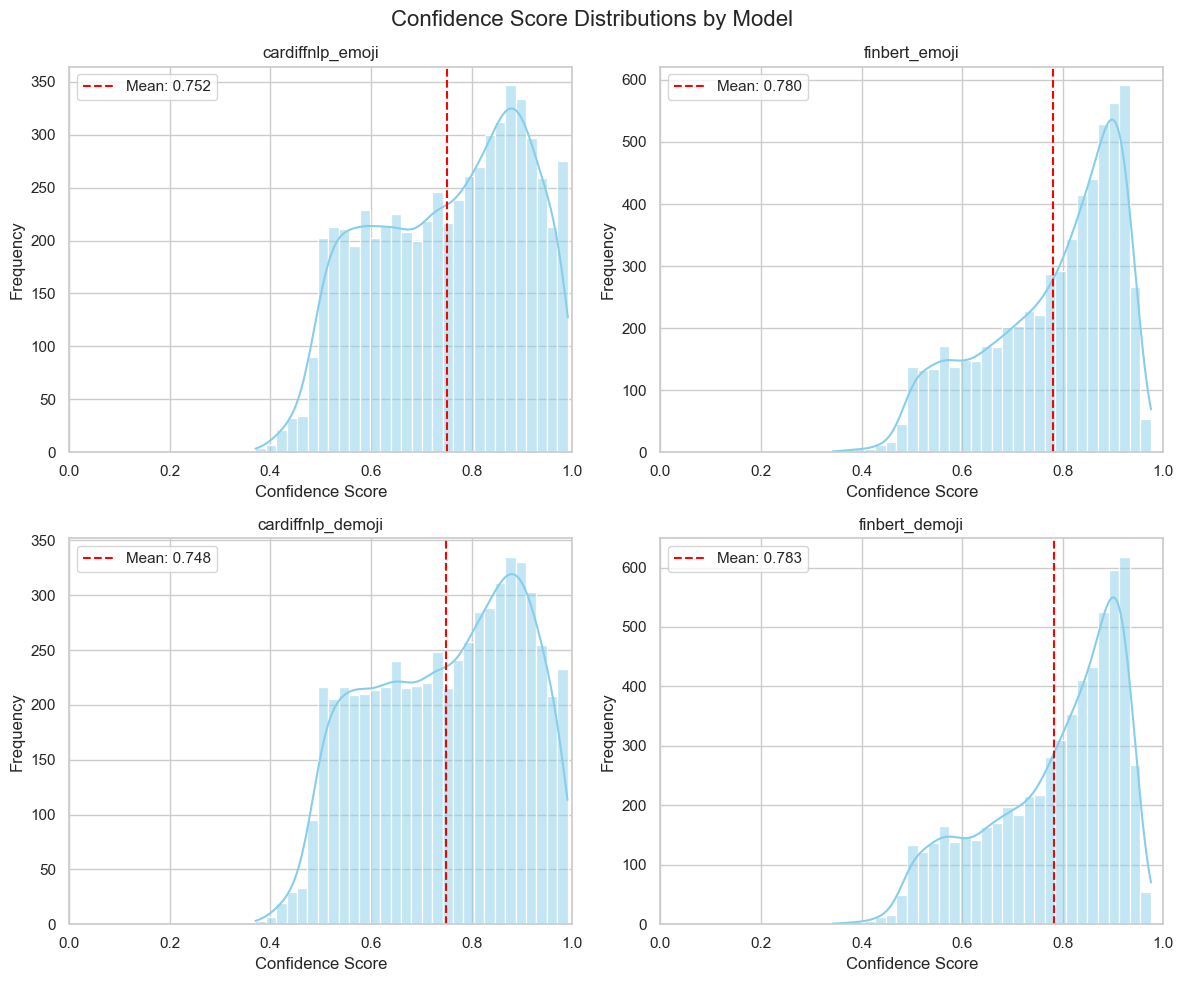


Score Statistics:

sentiment_cardiffnlp_emoji_score:
  Mean: 0.752
  Std: 0.149
  Min: 0.370
  Max: 0.991

sentiment_finbert_emoji_score:
  Mean: 0.780
  Std: 0.132
  Min: 0.343
  Max: 0.975

sentiment_cardiffnlp_demoji_score:
  Mean: 0.748
  Std: 0.147
  Min: 0.370
  Max: 0.990

sentiment_finbert_demoji_score:
  Mean: 0.783
  Std: 0.131
  Min: 0.343
  Max: 0.975
------------------------------------------------------------


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Analyzing Score Distributions ---")
print("="*60)

sns.set(style="whitegrid")

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    # Get all score columns
    score_columns = [col for col in df_sentiment_results.columns if col.endswith('_score') and 'sentiment_' in col]
    
    if score_columns:
        num_cols = len(score_columns)
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(score_columns[:4]):
            ax = axes[i]
            data = df_sentiment_results[col].dropna()
            
            sns.histplot(data, kde=True, bins=30, ax=ax, color='skyblue')
            ax.set_title(f'{col.replace("sentiment_", "").replace("_score", "")}')
            ax.set_xlabel('Confidence Score')
            ax.set_ylabel('Frequency')
            ax.set_xlim(0, 1)
            
            # Add mean line
            mean_score = data.mean()
            ax.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.3f}')
            ax.legend()
        
        plt.suptitle('Confidence Score Distributions by Model', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print("\nScore Statistics:")
        for col in score_columns:
            scores = df_sentiment_results[col].dropna()
            print(f"\n{col}:")
            print(f"  Mean: {scores.mean():.3f}")
            print(f"  Std: {scores.std():.3f}")
            print(f"  Min: {scores.min():.3f}")
            print(f"  Max: {scores.max():.3f}")
    else:
        print("No score columns found")
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)

Detailed Manual Inspection

In [18]:
# print("\n" + "="*60)
# print("--- Detailed Entry Inspection ---")
# print("="*60)

# if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
#     # Sample some entries for detailed inspection
#     print("Random sample of 5 entries with all sentiment predictions:\n")
    
#     # Get sentiment columns
#     label_cols = [col for col in df_sentiment_results.columns if col.endswith('_label') and 'sentiment_' in col]
#     score_cols = [col for col in df_sentiment_results.columns if col.endswith('_score') and 'sentiment_' in col]
    
#     # Sample entries
#     sample_df = df_sentiment_results.sample(n=5, random_state=42)
    
#     for idx, row in sample_df.iterrows():
#         print(f"Entry {idx}:")
#         print(f"Text: {row['text_clean_en'][:100]}...")
#         print("\nPredictions:")
        
#         for label_col in sorted(label_cols):
#             score_col = label_col.replace('_label', '_score')
#             if score_col in df_sentiment_results.columns:
#                 model_name = label_col.replace('sentiment_', '').replace('_label', '')
#                 label = row[label_col]
#                 score = row[score_col]
#                 print(f"  {model_name}: {label} (confidence: {score:.3f})")
        
#         print("-" * 80)
    
#     # Show disagreement cases
#     print("\n\nExamples where models strongly disagree:")
    
#     # Find cases where cardiffnlp and finbert disagree
#     cardiff_col = 'sentiment_cardiffnlp_demoji_label'
#     finbert_col = 'sentiment_finbert_demoji_label'
    
#     if cardiff_col in df_sentiment_results.columns and finbert_col in df_sentiment_results.columns:
#         disagreements = df_sentiment_results[
#             df_sentiment_results[cardiff_col] != df_sentiment_results[finbert_col]
#         ]
        
#         print(f"\nFound {len(disagreements)} disagreements between CardiffNLP and FinBERT (demoji)")
        
#         # Show a few examples
#         for idx, row in disagreements.head(3).iterrows():
#             print(f"\nText: {row['text_clean_en'][:150]}...")
#             print(f"CardiffNLP: {row[cardiff_col]} ({row['sentiment_cardiffnlp_demoji_score']:.3f})")
#             print(f"FinBERT: {row[finbert_col]} ({row['sentiment_finbert_demoji_score']:.3f})")
#             print("-" * 40)
    
# else:
#     print("ERROR: df_sentiment_results not available")

# print("-" * 60)

Model Performance Comparison

In [19]:
print("\n" + "="*60)
print("--- Model Performance Comparison ---")
print("="*60)

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    # Analyze confidence scores by model
    models_info = []
    
    label_cols = [col for col in df_sentiment_results.columns if col.endswith('_label') and 'sentiment_' in col]
    
    for label_col in label_cols:
        score_col = label_col.replace('_label', '_score')
        if score_col in df_sentiment_results.columns:
            model_name = label_col.replace('sentiment_', '').replace('_label', '')
            
            # Get label distribution
            label_dist = df_sentiment_results[label_col].value_counts()
            
            # Get average confidence by label
            avg_conf_by_label = df_sentiment_results.groupby(label_col)[score_col].mean()
            
            # Overall metrics
            avg_confidence = df_sentiment_results[score_col].mean()
            high_conf_count = (df_sentiment_results[score_col] > 0.8).sum()
            low_conf_count = (df_sentiment_results[score_col] < 0.5).sum()
            
            models_info.append({
                'Model': model_name,
                'Avg Confidence': avg_confidence,
                'High Conf (>0.8)': high_conf_count,
                'Low Conf (<0.5)': low_conf_count,
                'Most Common Label': label_dist.index[0],
                'Label Distribution': label_dist.to_dict()
            })
    
    # Display comparison
    comparison_df = pd.DataFrame(models_info)
    print("Model Comparison Summary:")
    print(comparison_df.to_string())
    
    # Recommendation based on analysis
    print("\n\n--- RECOMMENDATION ---")
    print("\nBased on the analysis, here are the key differences:")
    
    print("\n1. MODEL COMPARISON:")
    print("   - CardiffNLP: Trained on Twitter data, more balanced sentiment distribution")
    print("   - FinBERT: Trained on financial text, tends to predict more Neutral")
    
    print("\n2. EMOJI vs DEMOJI:")
    print("   - emoji: Keeps emojis as visual symbols")
    print("   - demoji: Converts emojis to text descriptions")
    
    # Find model with highest average confidence
    best_confidence_idx = comparison_df['Avg Confidence'].idxmax()
    best_model = comparison_df.loc[best_confidence_idx, 'Model']
    
    print(f"\n3. HIGHEST AVERAGE CONFIDENCE: {best_model}")
    print(f"   Average confidence: {comparison_df.loc[best_confidence_idx, 'Avg Confidence']:.3f}")
    
    # Specific recommendation
    print("\n4. RECOMMENDED MODEL:")
    print("   For Twitter economic sentiment analysis, consider:")
    print("   - 'sentiment_cardiffnlp_demoji_label' if you want balanced sentiment detection")
    print("   - 'sentiment_finbert_demoji_label' if you prefer conservative/neutral classifications")
    
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Model Performance Comparison ---
Model Comparison Summary:
               Model  Avg Confidence  High Conf (>0.8)  Low Conf (<0.5) Most Common Label                                     Label Distribution
0   cardiffnlp_emoji        0.751589              2667              246          Negative  {'Negative': 2157, 'Neutral': 2143, 'Positive': 1773}
1      finbert_emoji        0.780043              3286              147           Neutral   {'Neutral': 4484, 'Negative': 1021, 'Positive': 568}
2  cardiffnlp_demoji        0.747966              2604              248          Negative  {'Negative': 2216, 'Neutral': 2200, 'Positive': 1657}
3     finbert_demoji        0.782737              3345              153           Neutral   {'Neutral': 4531, 'Negative': 1031, 'Positive': 511}


--- RECOMMENDATION ---

Based on the analysis, here are the key differences:

1. MODEL COMPARISON:
   - CardiffNLP: Trained on Twitter data, more balanced sentiment distribution
   - FinBERT: Trained on financ

Model selection

In [20]:
# Cell 5: Select Final Model and Create Final Column
print("\n" + "="*60)
print("--- Selecting Final Sentiment Model ---")
print("="*60)

# Choose your model here based on the analysis above
CHOSEN_MODEL = 'sentiment_cardiffnlp_demoji_label'  # Change this based on your preference

if 'df_sentiment_results' in locals() and isinstance(df_sentiment_results, pd.DataFrame):
    
    if CHOSEN_MODEL in df_sentiment_results.columns:
        # Create final sentiment column
        df_sentiment_results['final_sentiment_label'] = df_sentiment_results[CHOSEN_MODEL]
        
        # Also copy the corresponding score
        score_col = CHOSEN_MODEL.replace('_label', '_score')
        if score_col in df_sentiment_results.columns:
            df_sentiment_results['final_sentiment_score'] = df_sentiment_results[score_col]
        
        print(f"Selected model: {CHOSEN_MODEL}")
        print("\nFinal sentiment distribution:")
        print(df_sentiment_results['final_sentiment_label'].value_counts())
        print(f"\nTotal entries: {len(df_sentiment_results):,}")
        
        # Show percentage distribution
        print("\nPercentage distribution:")
        pct_dist = df_sentiment_results['final_sentiment_label'].value_counts(normalize=True) * 100
        for label, pct in pct_dist.items():
            print(f"  {label}: {pct:.1f}%")
        
        # Save the results with final labels
        output_path = '../data/05.final/df_sentiment_final.parquet'
        df_sentiment_results.to_parquet(output_path, index=False)
        print(f"\nSaved final results to: {output_path}")
        
    else:
        print(f"ERROR: Chosen model column '{CHOSEN_MODEL}' not found")
        print("Available options:")
        for col in df_sentiment_results.columns:
            if col.endswith('_label') and 'sentiment_' in col:
                print(f"  - {col}")
else:
    print("ERROR: df_sentiment_results not available")

print("-" * 60)


--- Selecting Final Sentiment Model ---
Selected model: sentiment_cardiffnlp_demoji_label

Final sentiment distribution:
final_sentiment_label
Negative    2216
Neutral     2200
Positive    1657
Name: count, dtype: int64

Total entries: 6,073

Percentage distribution:
  Negative: 36.5%
  Neutral: 36.2%
  Positive: 27.3%

Saved final results to: ../data/05.final/df_sentiment_final.parquet
------------------------------------------------------------


#### Plots:

##### 0. After model selection checkout


--- Final Sentiment Analysis Visualization ---


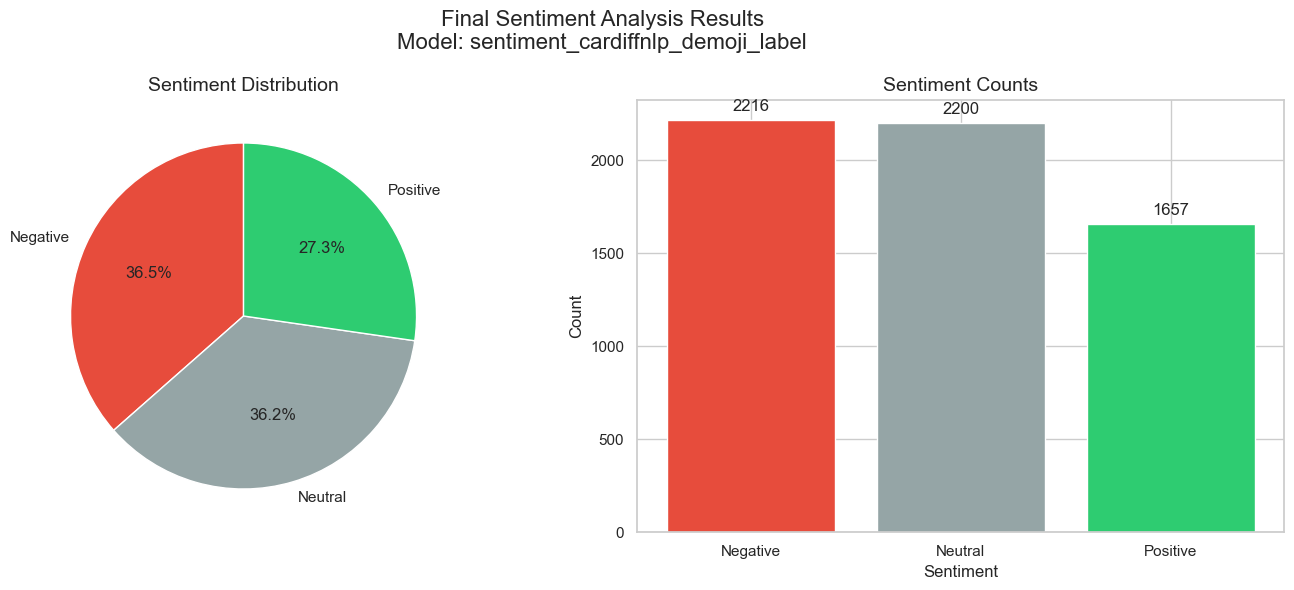


Analysis complete! Final sentiment labels are in the 'final_sentiment_label' column.
------------------------------------------------------------


In [21]:
# Cell 6: Visualize Final Results
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Final Sentiment Analysis Visualization ---")
print("="*60)

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Pie chart
    sentiment_counts = df_sentiment_results['final_sentiment_label'].value_counts()
    colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
    pie_colors = [colors.get(label, '#34495e') for label in sentiment_counts.index]
    
    ax1.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
            colors=pie_colors, startangle=90)
    ax1.set_title('Sentiment Distribution', fontsize=14)
    
    # Bar chart with counts
    ax2.bar(sentiment_counts.index, sentiment_counts.values, color=pie_colors)
    ax2.set_xlabel('Sentiment', fontsize=12)
    ax2.set_ylabel('Count', fontsize=12)
    ax2.set_title('Sentiment Counts', fontsize=14)
    
    # Add count labels on bars
    for i, (label, count) in enumerate(sentiment_counts.items()):
        ax2.text(i, count + 50, str(count), ha='center')
    
    plt.suptitle(f'Final Sentiment Analysis Results\nModel: {CHOSEN_MODEL}', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    print("\nAnalysis complete! Final sentiment labels are in the 'final_sentiment_label' column.")
    
else:
    print("ERROR: Final sentiment label not created. Run the previous cell first.")

print("-" * 60)

##### 1. Overall Party Sentiment Proportions


--- Party Sentiment Proportions (Overall) ---


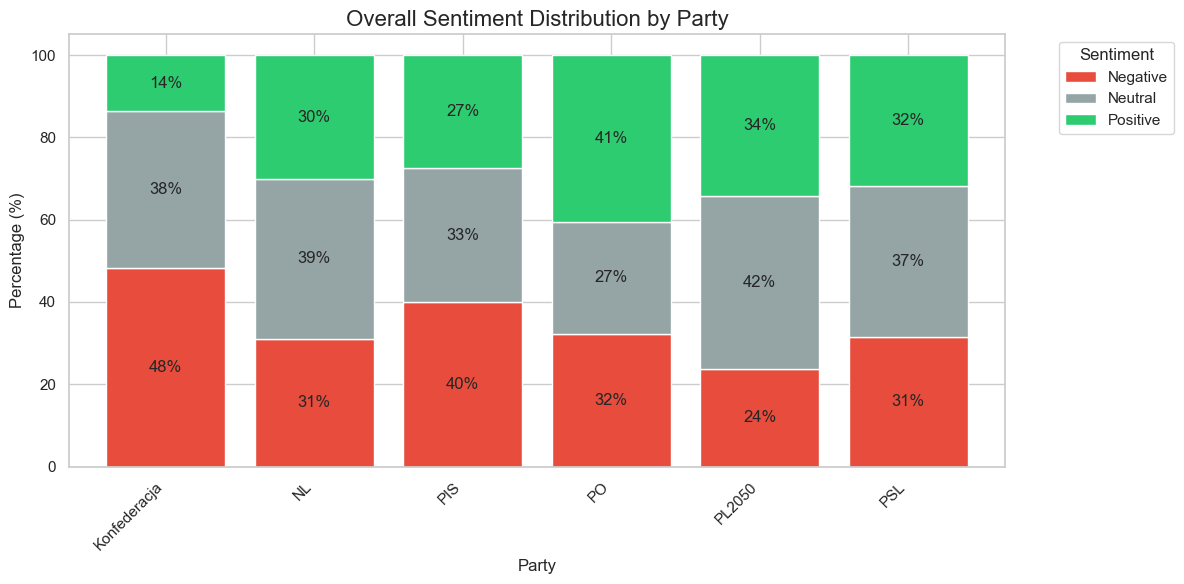

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment Proportions (Overall) ---")
print("="*60)

if 'df_sentiment_results' in locals():
    # Calculate sentiment proportions by party
    party_sentiment = df_sentiment_results.groupby(['party', 'final_sentiment_label']).size().unstack(fill_value=0)
    party_sentiment_pct = party_sentiment.div(party_sentiment.sum(axis=1), axis=0) * 100
    
    # Get top 10 parties by tweet volume
    top_parties = df_sentiment_results['party'].value_counts().head(10).index
    party_sentiment_pct = party_sentiment_pct.loc[top_parties]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot stacked bar chart
    colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
    party_sentiment_pct.plot(kind='bar', 
                            stacked=True, 
                            ax=ax,
                            color=[colors.get(col, '#333') for col in party_sentiment_pct.columns],
                            width=0.8)
    
    ax.set_title('Overall Sentiment Distribution by Party', fontsize=16)
    ax.set_xlabel('Party')
    ax.set_ylabel('Percentage (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for container in ax.containers:
        labels = [f'{v:.0f}%' if v > 3 else '' for v in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='center')
    
    # Position legend outside
    ax.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

##### 2.1. Party Sentiment by Year


--- Party Sentiment Proportions by Year ---


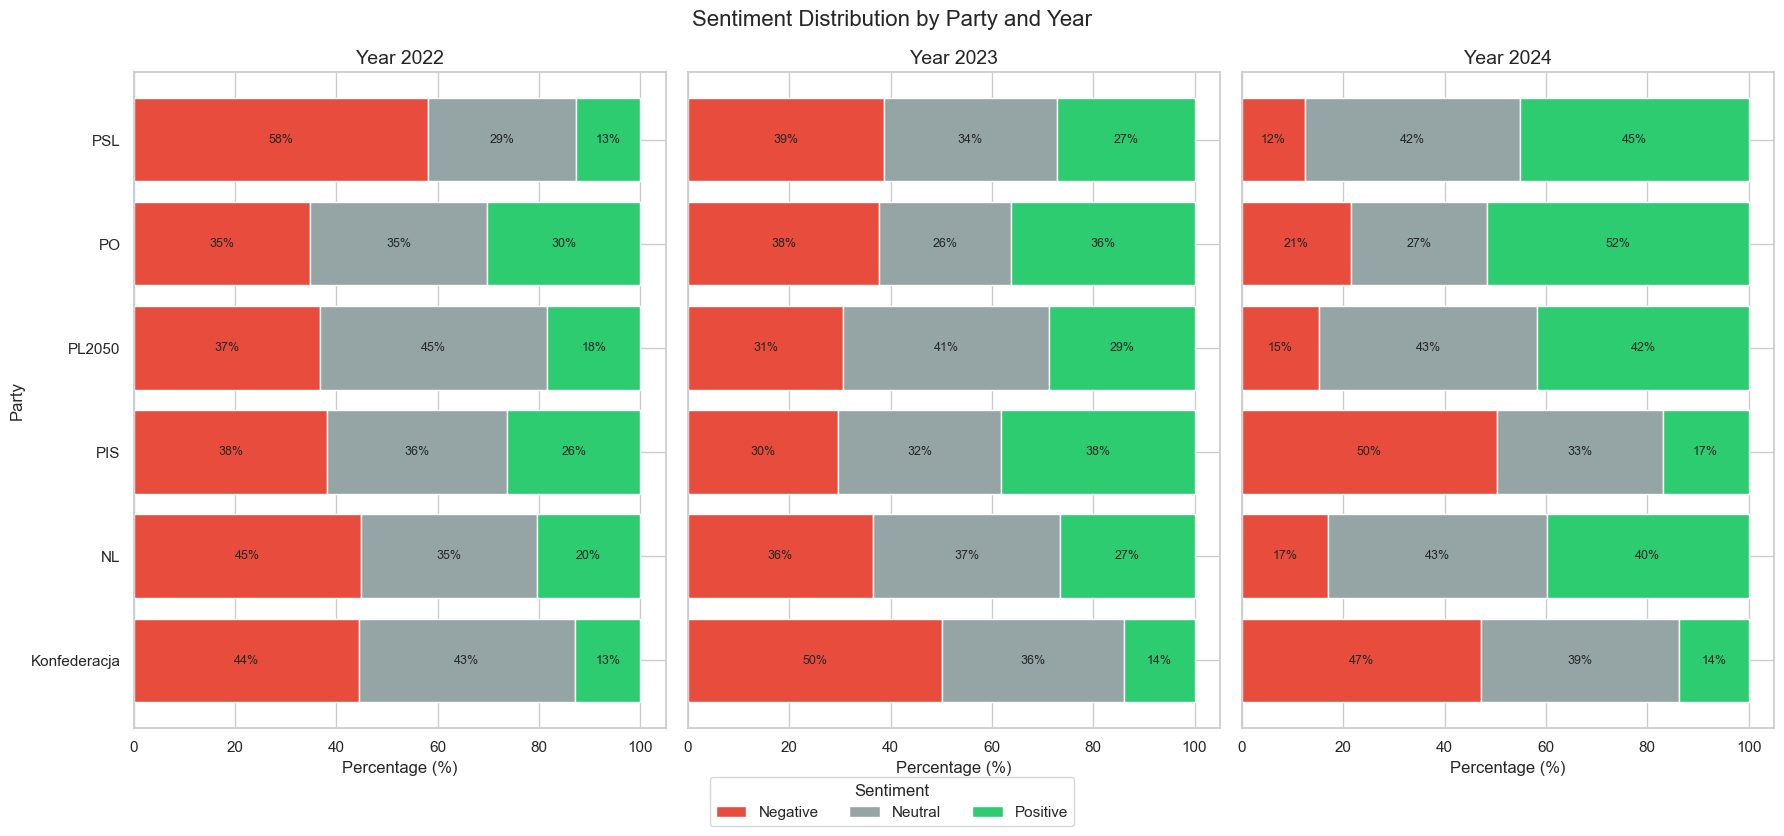

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment Proportions by Year ---")
print("="*60)

if 'df_sentiment_results' in locals():
    # Add year column
    df_year = df_sentiment_results.copy()
    df_year['year'] = pd.to_datetime(df_year['created_at']).dt.year
    
    # Get top parties
    top_parties = df_year['party'].value_counts().head(8).index
    
    # Calculate proportions by party and year
    party_year_sentiment = df_year[df_year['party'].isin(top_parties)].groupby(
        ['party', 'year', 'final_sentiment_label']
    ).size().unstack(fill_value=0)
    
    party_year_sentiment_pct = party_year_sentiment.div(
        party_year_sentiment.sum(axis=1), axis=0
    ) * 100
    
    # Create subplots
    years = sorted(df_year['year'].unique())
    fig, axes = plt.subplots(1, len(years), figsize=(6*len(years), 8), sharey=True)
    
    if len(years) == 1:
        axes = [axes]
    
    colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
    
    for idx, year in enumerate(years):
        ax = axes[idx]
        
        # Get data for this year
        year_data = party_year_sentiment_pct.loc[
            party_year_sentiment_pct.index.get_level_values('year') == year
        ]
        
        if not year_data.empty:
            year_data = year_data.droplevel('year')
            
            # Create horizontal stacked bars
            year_data.plot(kind='barh', 
                          stacked=True, 
                          ax=ax,
                          color=[colors.get(col, '#333') for col in year_data.columns],
                          width=0.8,
                          legend=False)  # Disable individual legends
            
            ax.set_title(f'Year {year}', fontsize=14)
            ax.set_xlabel('Percentage (%)')
            if idx == 0:
                ax.set_ylabel('Party')
            
            # Add percentage labels (only if > 5%)
            for container in ax.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
    
    # Add single legend at the bottom
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Sentiment', loc='lower center', 
               bbox_to_anchor=(0.5, -0.05), ncol=3)
    
    plt.suptitle('Sentiment Distribution by Party and Year', fontsize=16)
    plt.tight_layout()
    plt.show()

##### 2.2. Party Sentiment before and after the election

##### 3. Plot Overall Sentiment Over Time


--- Plotting Overall Sentiment Over Time ---


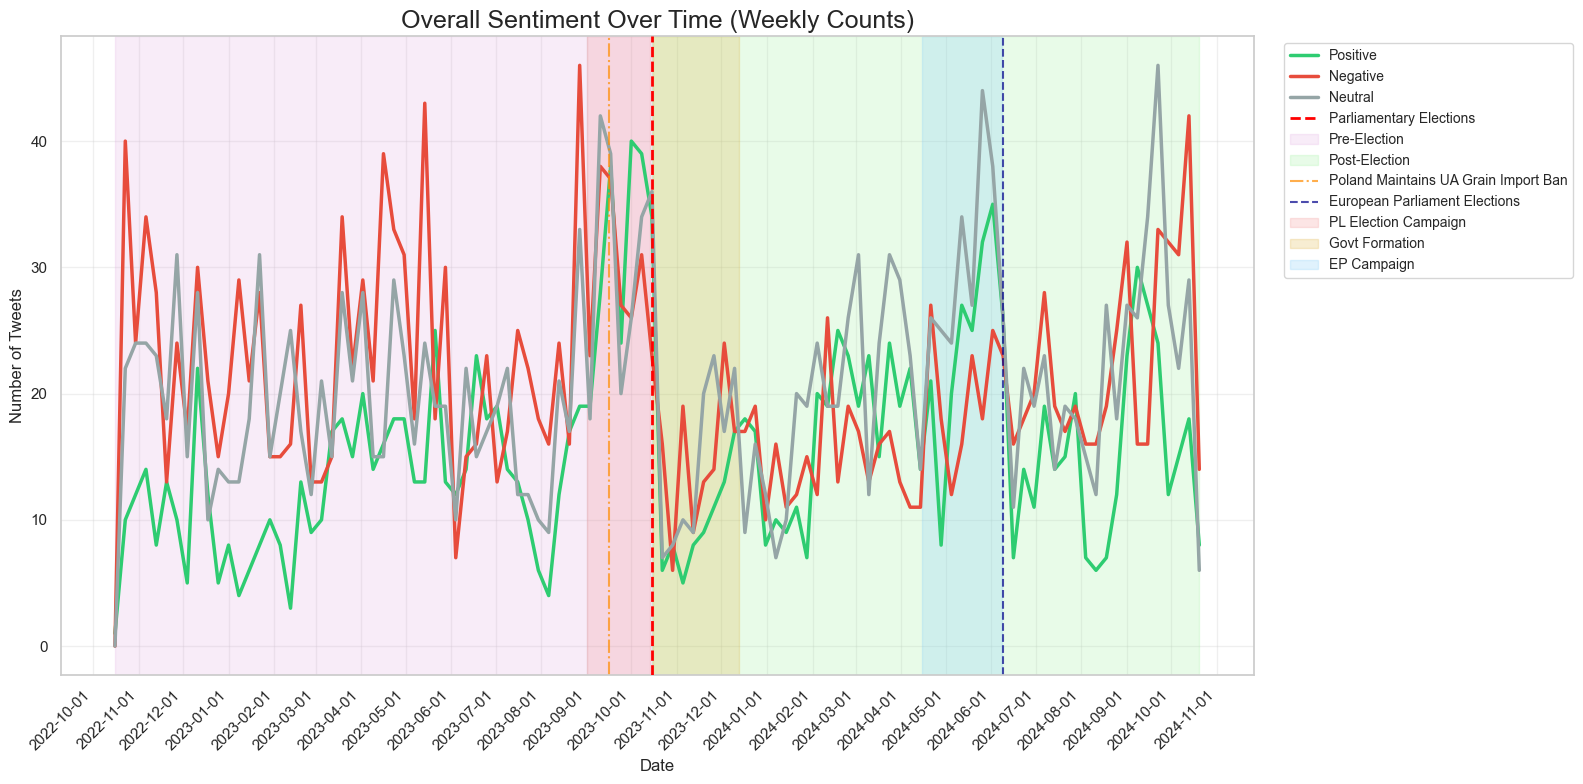

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

print("\n" + "="*60)
print("--- Plotting Overall Sentiment Over Time ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # 'W' for Weekly, 'ME' for Monthly
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}

# ANNOTATION TOGGLES
SHOW_MAIN_ELECTION = True
SHOW_ELECTION_SHADING = True
SHOW_OTHER_EVENTS = True
SHOW_PERIOD_ANNOTATIONS = True

# Main election
MAIN_ELECTION_DATE = '2023-10-15'

# Event annotations (vertical lines)
EVENT_ANNOTATIONS = [
    {'date': '2023-09-16', 'label': 'Poland Maintains UA Grain Import Ban', 'color': '#FF8C00', 'linestyle': '-.'},
    {'date': '2024-06-09', 'label': 'European Parliament Elections', 'color': 'darkblue', 'linestyle': '--'},
]

# Period annotations (shaded regions)
PERIOD_ANNOTATIONS = [
    {'start': '2023-09-01', 'end': '2023-10-14', 'label': 'PL Election Campaign', 'color': 'lightcoral', 'alpha': 0.2},
    {'start': '2023-10-16', 'end': '2023-12-13', 'label': 'Govt Formation', 'color': '#DAA520', 'alpha': 0.2},
    {'start': '2024-04-15', 'end': '2024-06-08', 'label': 'EP Campaign', 'color': 'lightskyblue', 'alpha': 0.25},
]

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_plot = df_sentiment_results.copy()
        df_plot['created_at'] = pd.to_datetime(df_plot['created_at'], utc=True)
        df_plot = df_plot.set_index('created_at')
        
        # Aggregate by time period and sentiment
        sentiment_counts = df_plot.groupby([
            pd.Grouper(freq=TIME_FREQUENCY), 
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        # Create plot
        fig, ax = plt.subplots(figsize=(16, 8))
        
        # Plot sentiment lines (without markers for cleaner look)
        for sentiment, color in SENTIMENT_COLORS.items():
            if sentiment in sentiment_counts.columns:
                ax.plot(sentiment_counts.index, 
                       sentiment_counts[sentiment], 
                       label=sentiment, 
                       color=color, 
                       linewidth=2.5)
        
        # Add annotations based on toggles
        if SHOW_MAIN_ELECTION:
            election_date = pd.to_datetime(MAIN_ELECTION_DATE, utc=True)
            ax.axvline(election_date, color='red', linestyle='--', linewidth=2, 
                      label=f'Parliamentary Elections', zorder=10)
            
            if SHOW_ELECTION_SHADING:
                # Pre-election shading
                ax.axvspan(sentiment_counts.index.min(), election_date, 
                          color='#DDA0DD', alpha=0.2, label='Pre-Election')
                # Post-election shading  
                ax.axvspan(election_date, sentiment_counts.index.max(), 
                          color='#90EE90', alpha=0.2, label='Post-Election')
        
        if SHOW_OTHER_EVENTS:
            for event in EVENT_ANNOTATIONS:
                event_date = pd.to_datetime(event['date'], utc=True)
                if sentiment_counts.index.min() <= event_date <= sentiment_counts.index.max():
                    ax.axvline(event_date, 
                              color=event['color'], 
                              linestyle=event['linestyle'],
                              alpha=0.7,
                              label=event['label'])
        
        if SHOW_PERIOD_ANNOTATIONS:
            for period in PERIOD_ANNOTATIONS:
                start_date = pd.to_datetime(period['start'], utc=True)
                end_date = pd.to_datetime(period['end'], utc=True)
                ax.axvspan(start_date, end_date,
                          color=period['color'],
                          alpha=period['alpha'],
                          label=period['label'])
        
        # Formatting
        freq_label = "Weekly" if TIME_FREQUENCY == 'W' else "Monthly"
        ax.set_title(f'Overall Sentiment Over Time ({freq_label} Counts)', fontsize=18)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel('Number of Tweets', fontsize=12)
        
        # Format dates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        # Legend
        ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error creating plot: {e}")
        import traceback
        traceback.print_exc()

##### 4. Plot Sentiment by Party Over Time with Annotations


--- Plotting Sentiment by Party Over Time ---
Plotting top 6 parties with annotations


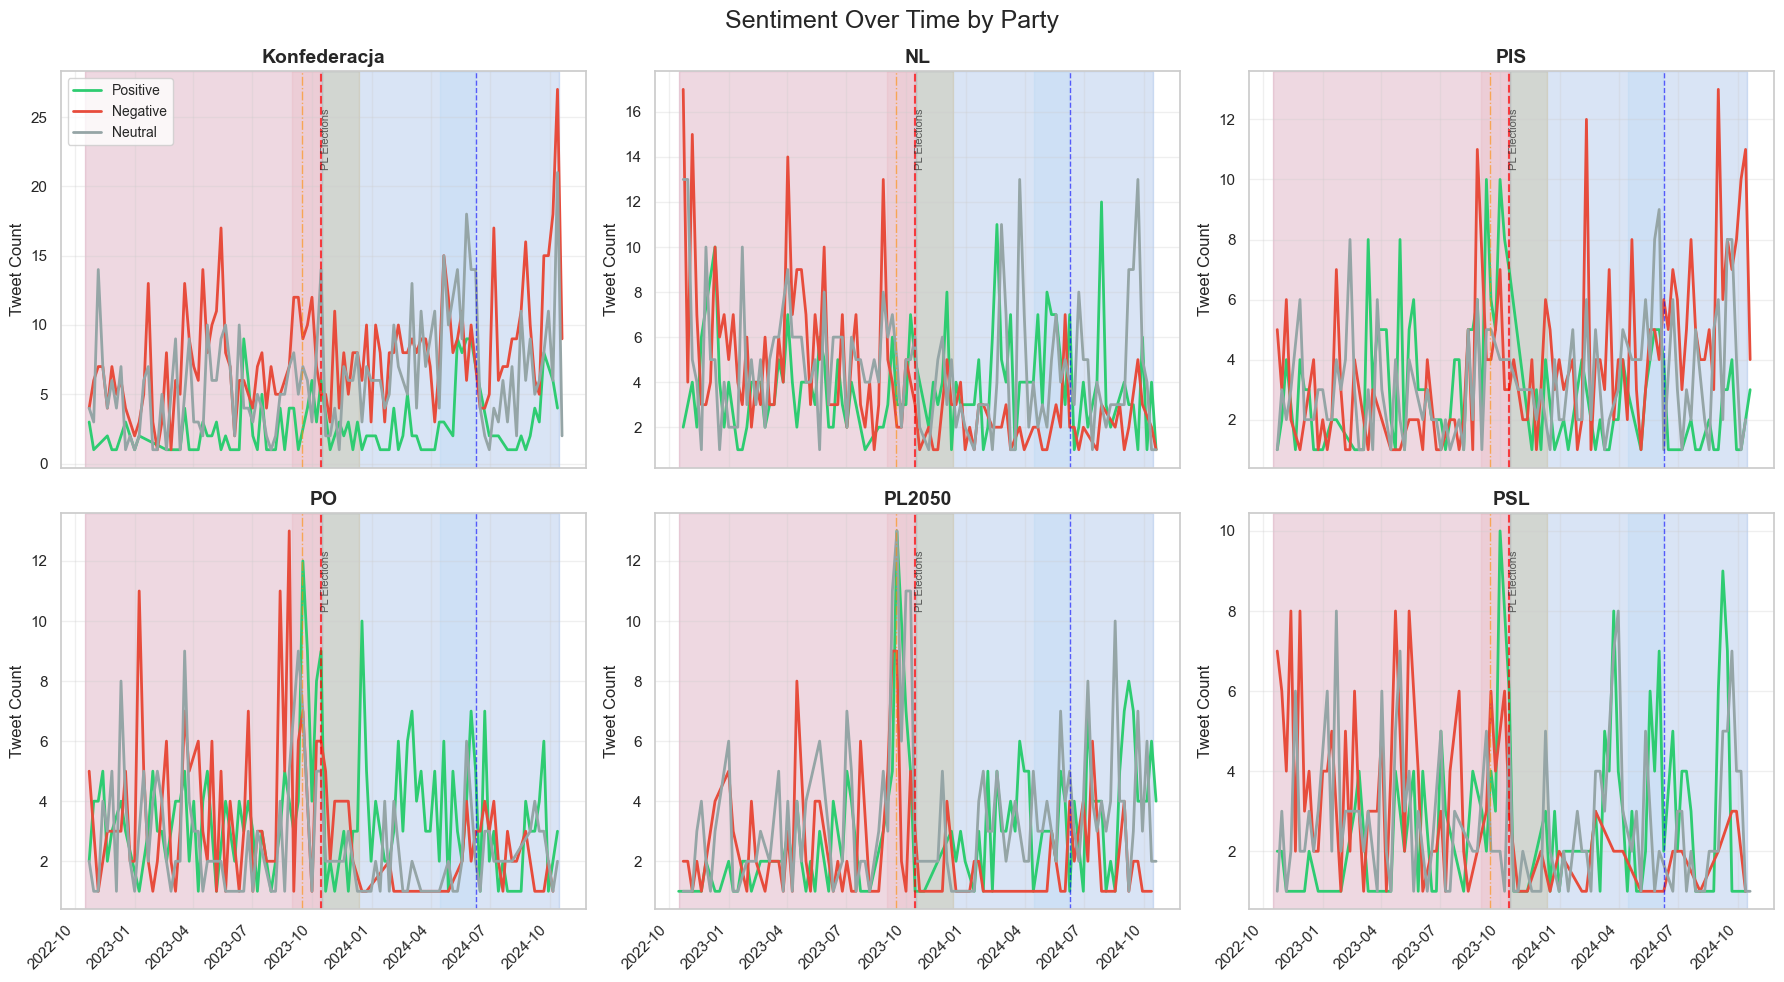

In [25]:
# Cell: Plot Sentiment by Party Over Time (with Toggleable Annotations)
# Purpose: Shows sentiment trends over time for each party with optional event annotations
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

print("\n" + "="*60)
print("--- Plotting Sentiment by Party Over Time ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # Weekly aggregation
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
TOP_N_PARTIES = 6

# ANNOTATION TOGGLES - Set to True/False to show/hide
SHOW_MAIN_ELECTION = True
SHOW_OTHER_EVENTS = True
SHOW_PERIOD_ANNOTATIONS = True

# Main election
MAIN_ELECTION = {'date': '2023-10-15', 'label': 'PL Elections', 'color': 'red'}

# Event annotations (vertical lines)
EVENT_ANNOTATIONS = [
    {'date': '2023-09-16', 'label': 'Grain Ban', 'color': '#FF8C00', 'linestyle': '-.'},
    {'date': '2024-06-09', 'label': 'EP Elections', 'color': 'blue', 'linestyle': '--'},
]

# Period annotations (shaded regions)
PERIOD_ANNOTATIONS = [
    {'start': '2023-09-01', 'end': '2023-10-14', 'label': 'Election Campaign', 'color': 'lightcoral', 'alpha': 0.1},
    {'start': '2024-04-15', 'end': '2024-06-08', 'label': 'EP Campaign', 'color': 'lightskyblue', 'alpha': 0.1},
    {'start': '2023-10-16', 'end': '2023-12-13', 'label': 'Govt Formation', 'color': '#DAA520', 'alpha': 0.2},
    {'start': '2022-10-16', 'end': '2023-10-15', 'label': 'Govt Formation', 'color': "#AA3C6A", 'alpha': 0.2},
    {'start': '2023-10-16', 'end': '2024-10-15', 'label': 'Govt Formation', 'color': "#417BD1", 'alpha': 0.2},
]

if 'df_sentiment_results' in locals():
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index.tolist()
        
        # Filter and prepare data
        df_party = df_sentiment_results[df_sentiment_results['party'].isin(top_parties)].copy()
        df_party['created_at'] = pd.to_datetime(df_party['created_at'], utc=True)
        
        # Aggregate by time, party, and sentiment
        party_sentiment_counts = df_party.groupby([
            pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
            'party',
            'final_sentiment_label'
        ]).size().reset_index(name='count')
        
        print(f"Plotting top {TOP_N_PARTIES} parties with annotations")
        
        # Create subplots
        num_cols = min(3, TOP_N_PARTIES)
        num_rows = (TOP_N_PARTIES + num_cols - 1) // num_cols
        
        fig, axes = plt.subplots(num_rows, num_cols, 
                                figsize=(18, 5*num_rows),
                                sharex=True, 
                                sharey=False)
        
        if num_rows == 1:
            axes = axes.reshape(1, -1)
        axes_flat = axes.flatten()
        
        # Plot each party
        for idx, party in enumerate(top_parties):
            ax = axes_flat[idx]
            party_data = party_sentiment_counts[party_sentiment_counts['party'] == party]
            
            # Plot sentiment lines
            for sentiment, color in SENTIMENT_COLORS.items():
                sentiment_data = party_data[party_data['final_sentiment_label'] == sentiment]
                if not sentiment_data.empty:
                    ax.plot(sentiment_data['created_at'], 
                           sentiment_data['count'],
                           color=color,
                           linewidth=2,
                           label=sentiment)
            
            # Add annotations based on toggles
            y_max = party_data['count'].max() if not party_data.empty else 1
            
            # Main election line
            if SHOW_MAIN_ELECTION:
                election_date = pd.to_datetime(MAIN_ELECTION['date'], utc=True)
                ax.axvline(election_date, color=MAIN_ELECTION['color'], 
                          linestyle='--', alpha=0.7, linewidth=1.5)
                ax.text(election_date, y_max * 0.95, MAIN_ELECTION['label'], 
                       rotation=90, verticalalignment='top', fontsize=8, alpha=0.7)
            
            # Other event lines
            if SHOW_OTHER_EVENTS:
                for event in EVENT_ANNOTATIONS:
                    event_date = pd.to_datetime(event['date'], utc=True)
                    if party_data['created_at'].min() <= event_date <= party_data['created_at'].max():
                        ax.axvline(event_date, color=event['color'], 
                                  linestyle=event['linestyle'], alpha=0.6, linewidth=1)
            
            # Period shadings
            if SHOW_PERIOD_ANNOTATIONS:
                for period in PERIOD_ANNOTATIONS:
                    start_date = pd.to_datetime(period['start'], utc=True)
                    end_date = pd.to_datetime(period['end'], utc=True)
                    ax.axvspan(start_date, end_date, 
                              color=period['color'], alpha=period['alpha'], zorder=0)
            
            # Formatting
            ax.set_title(f'{party}', fontsize=14, fontweight='bold')
            ax.set_ylabel('Tweet Count')
            ax.grid(True, alpha=0.3)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            
            # Legend only on first subplot
            if idx == 0:
                ax.legend(loc='upper left', fontsize=10)
        
        # Remove empty subplots
        for idx in range(TOP_N_PARTIES, len(axes_flat)):
            fig.delaxes(axes_flat[idx])
        
        # Format figure
        plt.suptitle('Sentiment Over Time by Party', fontsize=18, y=0.98)
        for ax in axes_flat[:TOP_N_PARTIES]:
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

##### 5. Stacked Area Chart - Overall Sentiment


--- Stacked Area Chart: Overall Sentiment ---


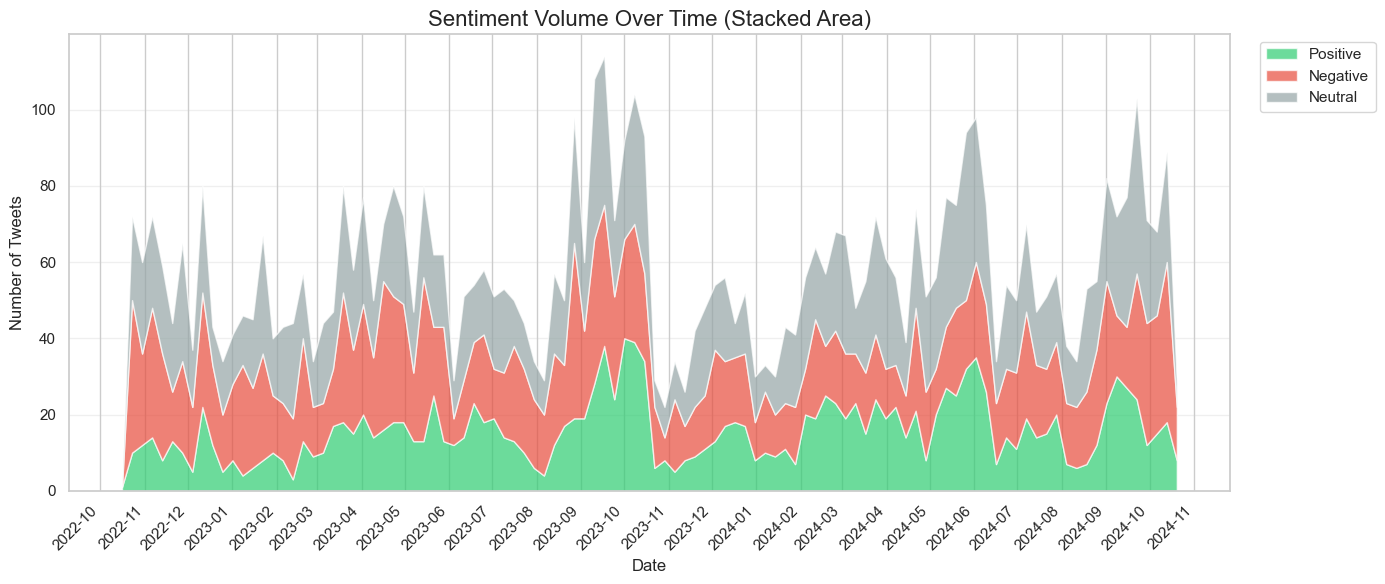

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

print("\n" + "="*60)
print("--- Stacked Area Chart: Overall Sentiment ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # Weekly aggregation
SENTIMENT_COLORS = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}

if 'df_sentiment_results' in locals():
    # Prepare data
    df_area = df_sentiment_results.copy()
    df_area['created_at'] = pd.to_datetime(df_area['created_at'], utc=True)
    df_area = df_area.set_index('created_at')
    
    # Aggregate by time and sentiment
    sentiment_counts = df_area.groupby([
        pd.Grouper(freq=TIME_FREQUENCY),
        'final_sentiment_label'
    ]).size().unstack(fill_value=0)
    
    # Ensure all sentiments present
    for sentiment in SENTIMENT_COLORS.keys():
        if sentiment not in sentiment_counts.columns:
            sentiment_counts[sentiment] = 0
    
    # Create stacked area plot
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot stacked areas
    ax.stackplot(sentiment_counts.index, 
                [sentiment_counts[s].values for s in SENTIMENT_COLORS.keys()],
                labels=list(SENTIMENT_COLORS.keys()),
                colors=list(SENTIMENT_COLORS.values()),
                alpha=0.7)
    
    # Formatting
    ax.set_title('Sentiment Volume Over Time (Stacked Area)', fontsize=16)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Tweets')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Legend
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

##### 6.1. Sentiment Distribution for Top Users by Party (# number of tweets)


--- Top Users Sentiment Analysis by Party ---


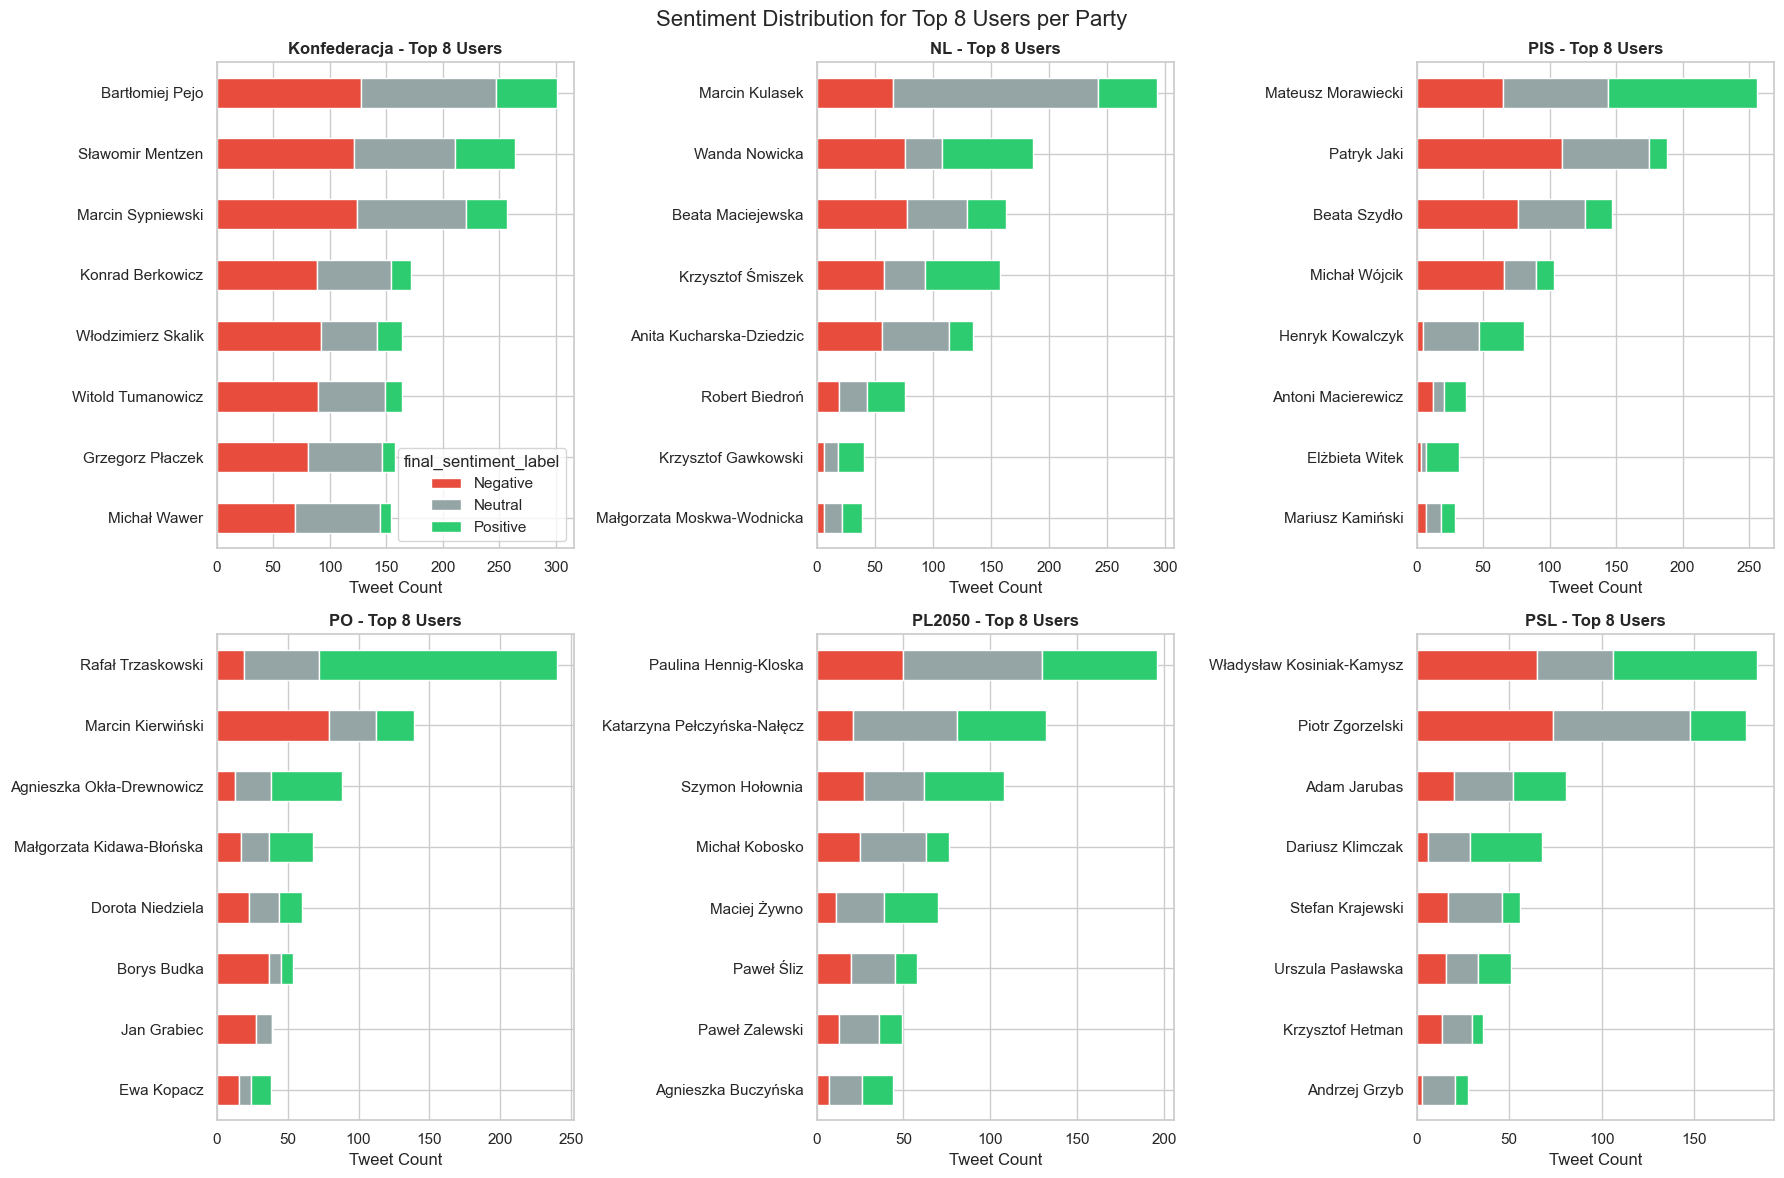

------------------------------------------------------------


In [ ]:
# Cell: Sentiment Distribution for Top Users by Party
# Purpose: Shows sentiment breakdown for the most active users in each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Top Users Sentiment Analysis by Party ---")
print("="*60)

# Configuration
TOP_N_USERS = 8  # Top users per party to analyze
TOP_N_PARTIES = 6  # Number of parties to show

if 'df_sentiment_results' in locals() and 'name' in df_sentiment_results.columns:
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Find top users per party
        top_users_list = []
        for party in top_parties:
            party_data = df_sentiment_results[df_sentiment_results['party'] == party]
            top_users = party_data['name'].value_counts().head(TOP_N_USERS).index.tolist()
            top_users_list.extend([(party, user) for user in top_users])
        
        # Filter data for top users
        party_user_pairs = pd.DataFrame(top_users_list, columns=['party', 'name'])
        df_top_users = pd.merge(df_sentiment_results, party_user_pairs, on=['party', 'name'])
        
        # Calculate sentiment counts
        user_sentiment = df_top_users.groupby(['party', 'name', 'final_sentiment_label']).size().reset_index(name='count')
        
        # Create visualization
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes_flat = axes.flatten()
        
        colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c', 'Neutral': '#95a5a6'}
        
        for idx, party in enumerate(top_parties):
            ax = axes_flat[idx]
            party_data = user_sentiment[user_sentiment['party'] == party]
            
            # Pivot for stacked bars
            pivot_data = party_data.pivot(index='name', columns='final_sentiment_label', values='count').fillna(0)
            
            # Sort by total tweets
            pivot_data['total'] = pivot_data.sum(axis=1)
            pivot_data = pivot_data.sort_values('total', ascending=True).drop('total', axis=1)
            
            # Plot horizontal stacked bars
            pivot_data.plot(kind='barh', stacked=True, ax=ax, 
                          color=[colors.get(col, '#333') for col in pivot_data.columns],
                          legend=idx==0)
            
            ax.set_title(f'{party} - Top {TOP_N_USERS} Users', fontsize=12, fontweight='bold')
            ax.set_xlabel('Tweet Count')
            ax.set_ylabel('')
            
        # Remove empty subplots
        for idx in range(len(top_parties), len(axes_flat)):
            fig.delaxes(axes_flat[idx])
        
        plt.suptitle(f'Sentiment Distribution for Top {TOP_N_USERS} Users per Party', fontsize=16)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")

##### 6.2. Sentiment Distribution for Top Users by Party (% percentage of tweets)

##### 6.3. Sentiment Distribution for Top Users by Party (Weighted tweets)

##### 7.1. Positive vs Negative Analysis (Excluding Neutral) by User (# number of tweets)


--- Positive vs Negative Sentiment for Top Users ---


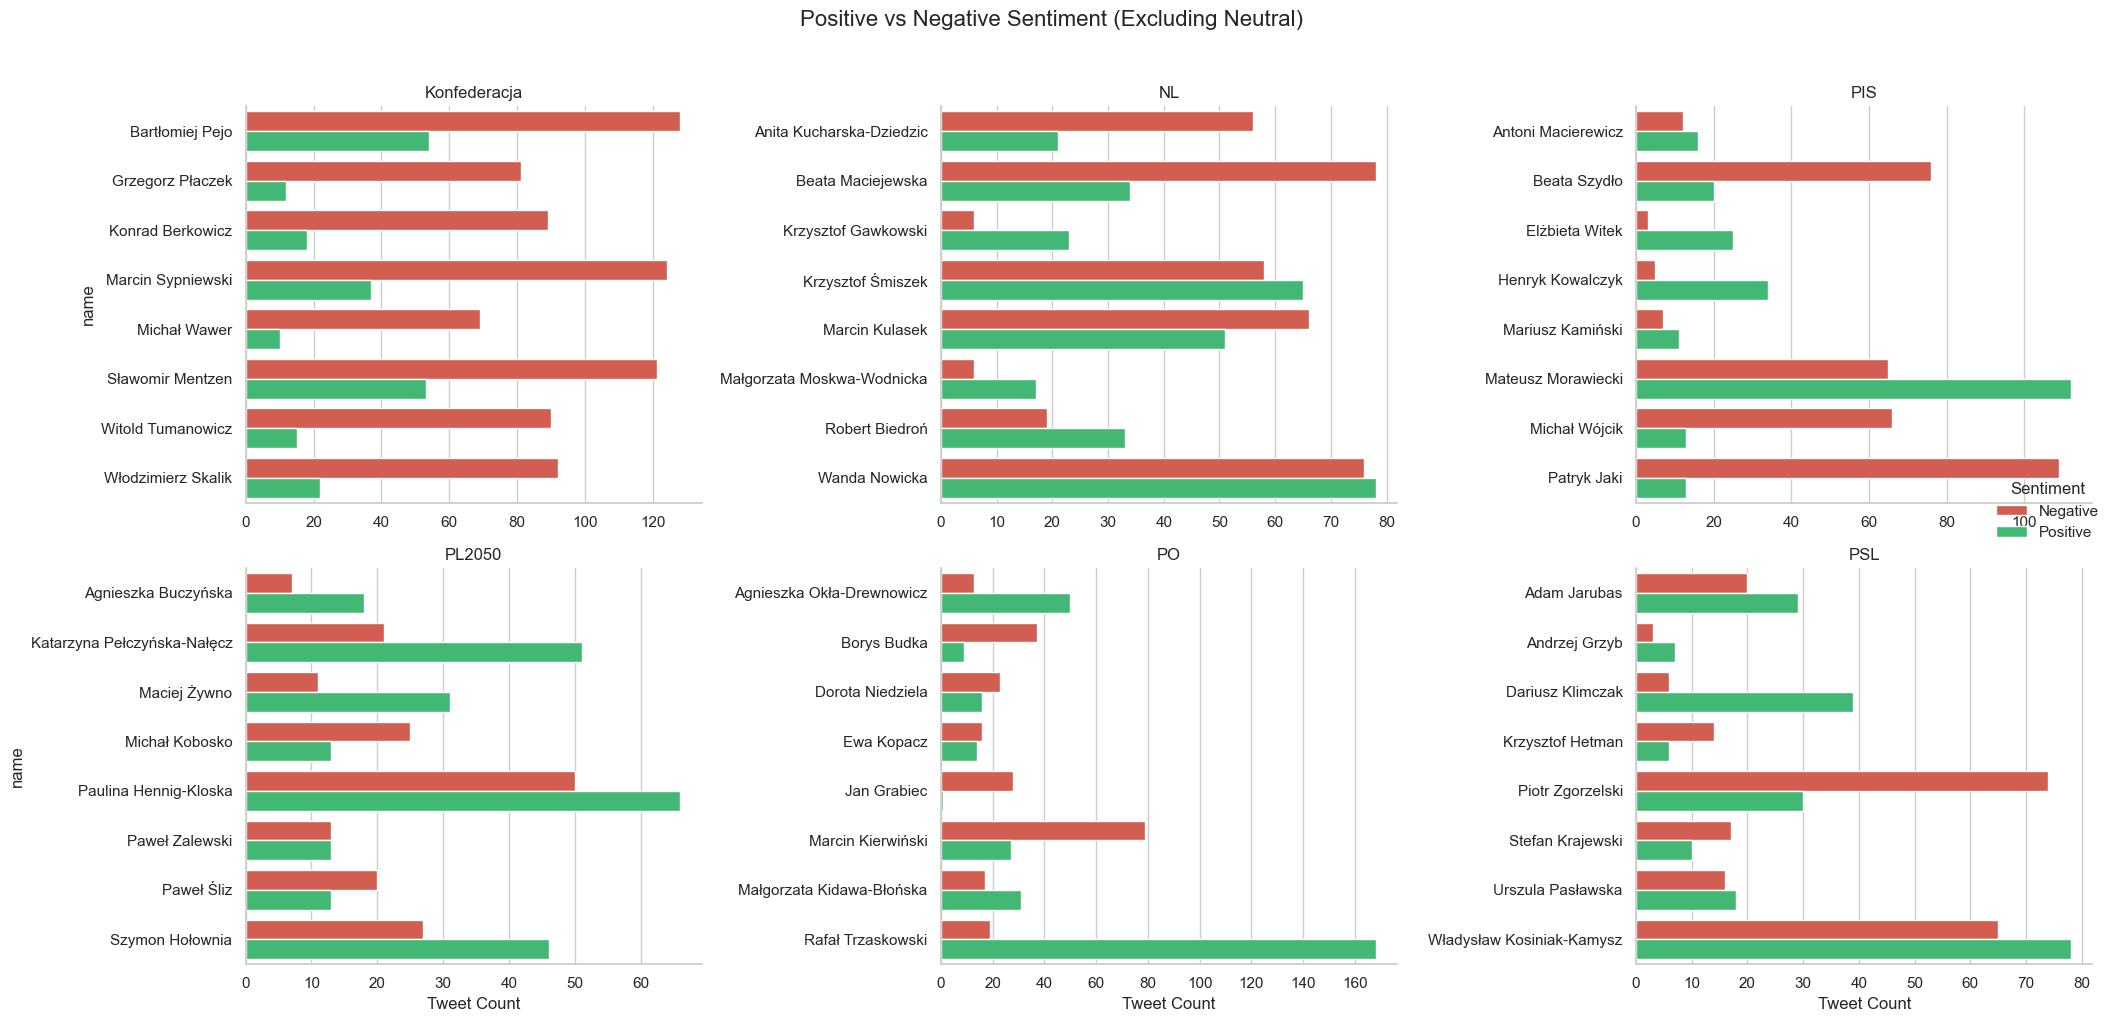


Positive/Negative Ratio by Party:
final_sentiment_label  Positive  Negative  Ratio
party                                           
Konfederacja                221       794   0.28
NL                          322       365   0.88
PIS                         244       343   0.71
PL2050                      251       174   1.44
PO                          316       232   1.36
PSL                         217       215   1.01
------------------------------------------------------------


In [ ]:
# Cell: Positive vs Negative Sentiment - Top Users
# Purpose: Compares only positive and negative sentiments for top users (excludes neutral)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Positive vs Negative Sentiment for Top Users ---")
print("="*60)

# Configuration
TOP_N_USERS = 8
TOP_N_PARTIES = 6

if 'df_sentiment_results' in locals() and 'name' in df_sentiment_results.columns:
    try:
        # Get top parties
        top_parties = df_sentiment_results['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Find top users per party
        top_users_list = []
        for party in top_parties:
            party_data = df_sentiment_results[df_sentiment_results['party'] == party]
            top_users = party_data['name'].value_counts().head(TOP_N_USERS).index.tolist()
            top_users_list.extend([(party, user) for user in top_users])
        
        # Filter data
        party_user_pairs = pd.DataFrame(top_users_list, columns=['party', 'name'])
        df_top_users = pd.merge(df_sentiment_results, party_user_pairs, on=['party', 'name'])
        
        # Filter only Positive and Negative sentiments
        df_pos_neg = df_top_users[df_top_users['final_sentiment_label'].isin(['Positive', 'Negative'])]
        
        # Calculate counts
        user_sentiment = df_pos_neg.groupby(['party', 'name', 'final_sentiment_label']).size().reset_index(name='count')
        
        # Create visualization
        g = sns.catplot(data=user_sentiment,
                       x='count', y='name', hue='final_sentiment_label',
                       col='party', col_wrap=3,
                       kind='bar', orient='h',
                       palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
                       height=5, aspect=1.3,
                       sharex=False, sharey=False)
        
        # Format
        g.set_titles("{col_name}")
        g.set_axis_labels("Tweet Count", "name")
        g.fig.suptitle('Positive vs Negative Sentiment (Excluding Neutral)', fontsize=16, y=1.02)
        
        # Adjust legend
        g._legend.set_title("Sentiment")
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print("\nPositive/Negative Ratio by Party:")
        pos_neg_ratio = df_pos_neg.groupby(['party', 'final_sentiment_label']).size().unstack(fill_value=0)
        pos_neg_ratio['Ratio'] = pos_neg_ratio['Positive'] / pos_neg_ratio['Negative']
        print(pos_neg_ratio[['Positive', 'Negative', 'Ratio']].round(2))
        
    except Exception as e:
        print(f"Error: {e}")

##### 7.2. Positive vs Negative Analysis (Excluding Neutral) by User (% percentage of tweets)

##### 7.3. Positive vs Negative Analysis (Excluding Neutral) by User (Weighted tweets)


##### 8. Percentage Sentiment Change (Before vs. After Election)

In [39]:
# === Notebook Cell: Plot Percentage Sentiment Change (Before vs. After Election) ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import traceback # Already imported, but ensure it's there if needed elsewhere
import numpy as np

print("\n" + "="*60)
print("--- Plotting Percentage Sentiment Change (Before vs. After Election) ---")
print("="*60)

# --- CONFIGURATION: YOU NEED TO SET THESE ---
YOUR_DATAFRAME_NAME = 'df_sentiment_results' # e.g., df_election_analysis
YOUR_PARTY_COLUMN_NAME = 'party' # e.g., 'party' or 'political_party'
YOUR_ELECTION_DATE_STR = '2023-10-15' # e.g., '2023-10-15'
# --- END CONFIGURATION ---


# Check if your specific DataFrame exists and is a DataFrame
if YOUR_DATAFRAME_NAME in locals() and isinstance(locals()[YOUR_DATAFRAME_NAME], pd.DataFrame):
    
    # Use a clear variable for your DataFrame within this cell's logic
    source_df = locals()[YOUR_DATAFRAME_NAME]

    pct_change_cols_to_plot = []
    # These are the expected column names for percentage changes.
    # If your columns are named differently, update these strings.
    positive_change_col = 'Positive_Pct_Change'
    negative_change_col = 'Negative_Pct_Change'

    if positive_change_col in source_df.columns:
        pct_change_cols_to_plot.append(positive_change_col)
    if negative_change_col in source_df.columns:
        pct_change_cols_to_plot.append(negative_change_col)
    
    if not pct_change_cols_to_plot:
        print(f"ERROR: No percentage change columns (e.g., '{positive_change_col}', '{negative_change_col}') found in '{YOUR_DATAFRAME_NAME}'.")
        print("Ensure the previous cell for numerical change calculation ran correctly and generated these columns in your DataFrame.")
    else:
        # Make sure YOUR_PARTY_COLUMN_NAME is the index or a column.
        # If it's the index, reset it. If it's already a column, this reset_index() might not be needed
        # or might behave differently if the index is not named.
        # Assuming your DataFrame has 'party' information as a column or can be made one from the index.
        if source_df.index.name == YOUR_PARTY_COLUMN_NAME or YOUR_PARTY_COLUMN_NAME in source_df.columns:
            if source_df.index.name == YOUR_PARTY_COLUMN_NAME:
                 df_pct_change_for_plot = source_df[pct_change_cols_to_plot].reset_index().copy()
            else: # It's already a column
                 df_pct_change_for_plot = source_df[[YOUR_PARTY_COLUMN_NAME] + pct_change_cols_to_plot].copy()
        else:
            print(f"ERROR: Party column '{YOUR_PARTY_COLUMN_NAME}' not found as index or column in '{YOUR_DATAFRAME_NAME}'.")
            df_pct_change_for_plot = pd.DataFrame() # Empty to prevent further errors

        if not df_pct_change_for_plot.empty:
            # Replace potential NaN/Inf with 0 for plotting
            df_pct_change_for_plot = df_pct_change_for_plot.fillna(0).replace([np.inf, -np.inf], 0)

            # Melt the DataFrame for easier plotting with seaborn
            df_melted_pct = pd.melt(df_pct_change_for_plot, 
                                    id_vars=[YOUR_PARTY_COLUMN_NAME], 
                                    value_vars=pct_change_cols_to_plot,
                                    var_name='Sentiment_Change_Metric', 
                                    value_name='Percentage_Change')

            # Extract base sentiment (Positive/Negative) for coloring
            df_melted_pct['Sentiment_Type'] = df_melted_pct['Sentiment_Change_Metric'].apply(
                lambda x: 'Positive' if 'Positive' in x else 'Negative' if 'Negative' in x else 'Other'
            )
            
            print("\nData prepared for Percentage Change Plot:")
            # Use display if in Jupyter, otherwise print
            try:
                display(df_melted_pct.head())
            except NameError:
                print(df_melted_pct.head())

            if df_melted_pct.empty:
                print("No data to plot for percentage changes after melting.")
            else:
                num_parties = df_melted_pct[YOUR_PARTY_COLUMN_NAME].nunique()
                plt.figure(figsize=(10, max(4, num_parties * 0.6))) 
                
                change_palette = {'Positive': 'green', 'Negative': 'red'}

                bar_plot = sns.barplot(
                    data=df_melted_pct,
                    y=YOUR_PARTY_COLUMN_NAME, 
                    x='Percentage_Change', 
                    hue='Sentiment_Type',   
                    palette=change_palette,
                    orient='h',
                    dodge=True 
                )
                
                plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
                plt.xlabel('Percentage Change (%) in Tweet Count')
                plt.ylabel('Party') # Or use YOUR_PARTY_COLUMN_NAME.title() for a dynamic label
                plt.title(f'Percentage Change in Positive/Negative Sentiment Tweets\n(After vs. Before Election {YOUR_ELECTION_DATE_STR})', fontsize=15)
                plt.legend(title='Sentiment Category', loc='lower right')
                plt.grid(axis='x', linestyle='--', alpha=0.7)
                
                for p in bar_plot.patches:
                    width = p.get_width()
                    text_x_pos = width + (5 if width > 0 else -5) 
                    ha = 'left' if width > 0 else 'right'
                    
                    if width != 0: 
                        bar_plot.text(text_x_pos, 
                                      p.get_y() + p.get_height() / 2., 
                                      f"{width:.1f}%", 
                                      va='center', 
                                      ha=ha,
                                      fontsize=8)

                plt.tight_layout()
                plt.show()
else:
    print(f"ERROR: DataFrame named '{YOUR_DATAFRAME_NAME}' not found or is not a Pandas DataFrame. Please load/create it first.")
    if YOUR_DATAFRAME_NAME not in locals():
        print(f"'{YOUR_DATAFRAME_NAME}' was not found in the current environment's local variables.")
    elif not isinstance(locals()[YOUR_DATAFRAME_NAME], pd.DataFrame):
        print(f"'{YOUR_DATAFRAME_NAME}' was found, but it is not a Pandas DataFrame. It is a {type(locals()[YOUR_DATAFRAME_NAME])}.")


print("\n" + "="*60)
print("--- Percentage Sentiment Change Plotting Complete ---")
print("="*60)


--- Plotting Percentage Sentiment Change (Before vs. After Election) ---
ERROR: No percentage change columns (e.g., 'Positive_Pct_Change', 'Negative_Pct_Change') found in 'df_sentiment_results'.
Ensure the previous cell for numerical change calculation ran correctly and generated these columns in your DataFrame.

--- Percentage Sentiment Change Plotting Complete ---


##### 9. Net Sentiment Score Over Time


--- Net Sentiment Score Analysis ---


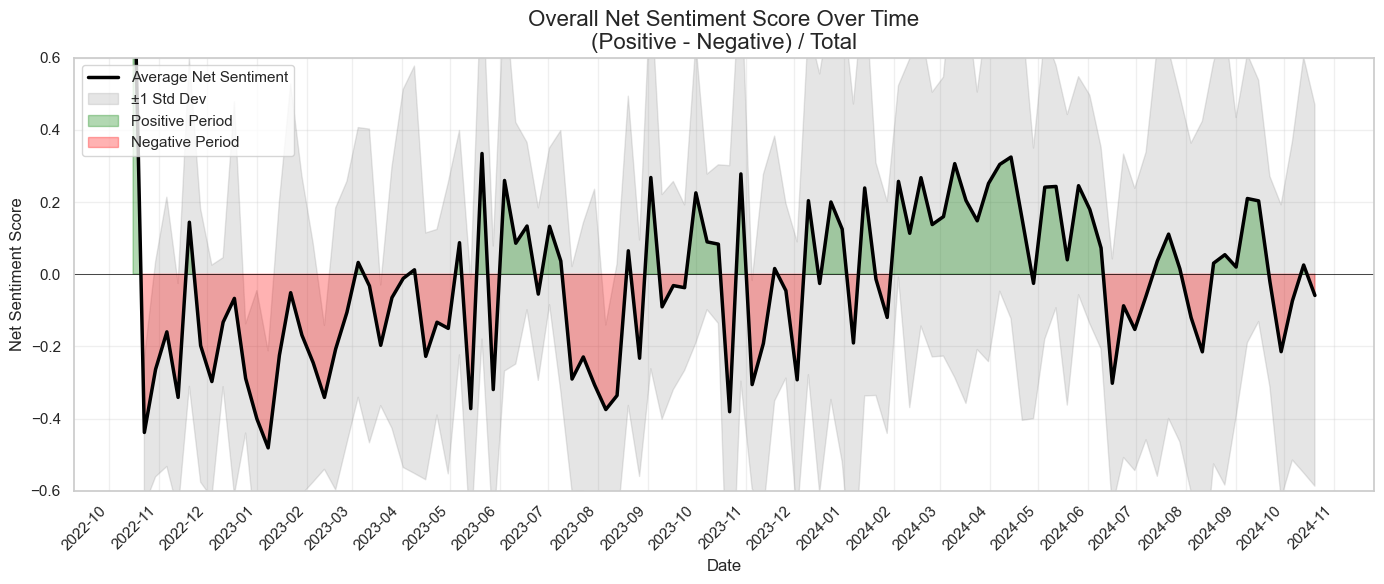


Generating per-party net sentiment plots...


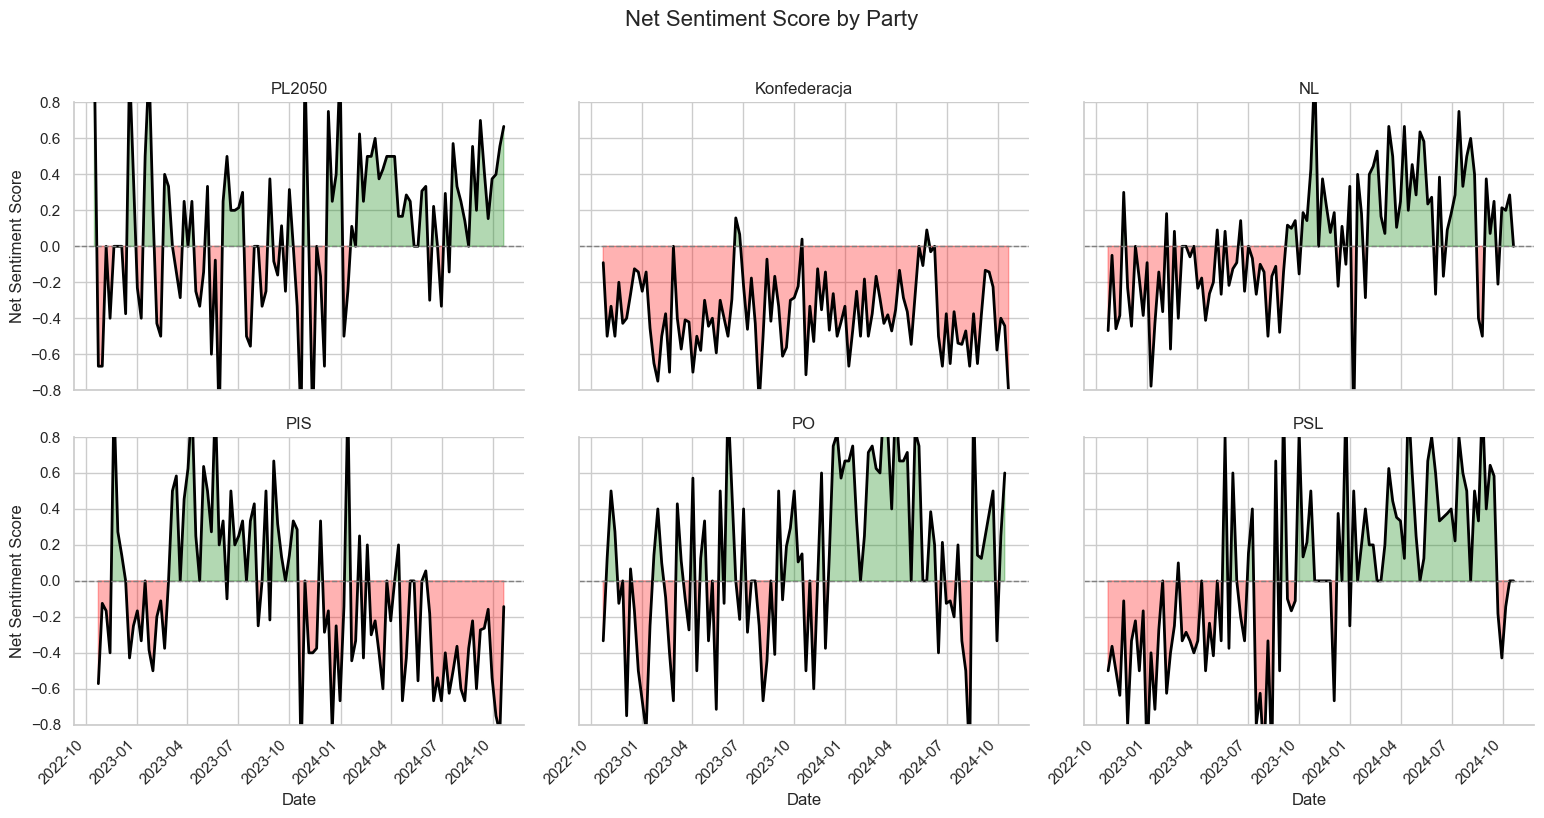


Net Sentiment Summary by Party:
               mean    std    min    max
party                                   
Konfederacja -0.369  0.208 -0.875  0.158
NL            0.032  0.346 -1.000  1.000
PIS          -0.084  0.431 -1.000  1.000
PL2050        0.099  0.435 -1.000  1.000
PO            0.125  0.464 -1.000  1.000
PSL           0.026  0.476 -1.000  1.000
------------------------------------------------------------


In [42]:
# Purpose: Shows sentiment polarity trends - positive values indicate optimistic sentiment, negative indicate pessimistic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("--- Net Sentiment Score Analysis ---")
print("="*60)

# Configuration
TIME_FREQUENCY = 'W'  # 'W' for Weekly, 'ME' for Monthly
SHOW_CONFIDENCE_BAND = True  # Show confidence intervals

if 'df_sentiment_results' in locals() and 'final_sentiment_label' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_net = df_sentiment_results.copy()
        df_net['created_at'] = pd.to_datetime(df_net['created_at'], utc=True)
        
        # Calculate sentiment counts by time and party
        sentiment_counts = df_net.groupby([
            pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
            'party',
            'final_sentiment_label'
        ]).size().unstack(fill_value=0)
        
        # Ensure all sentiments exist
        for sentiment in ['Positive', 'Negative', 'Neutral']:
            if sentiment not in sentiment_counts.columns:
                sentiment_counts[sentiment] = 0
        
        # Calculate Net Sentiment Score: (Positive - Negative) / (Positive + Negative + Neutral)
        sentiment_counts['total'] = sentiment_counts[['Positive', 'Negative', 'Neutral']].sum(axis=1)
        sentiment_counts['net_score'] = (
            (sentiment_counts['Positive'] - sentiment_counts['Negative']) / 
            sentiment_counts['total'].replace(0, 1)  # Avoid division by zero
        )
        
        # Reset index for plotting
        plot_data = sentiment_counts[['net_score']].reset_index()
        
        # Calculate overall net sentiment (average across parties)
        overall_net = plot_data.groupby('created_at')['net_score'].agg(['mean', 'std'])
        
        # --- Plot 1: Overall Net Sentiment with Confidence Band ---
        fig, ax = plt.subplots(figsize=(14, 6))
        
        # Plot main line
        ax.plot(overall_net.index, overall_net['mean'], 
                color='black', linewidth=2.5, label='Average Net Sentiment')
        
        # Add confidence band if requested
        if SHOW_CONFIDENCE_BAND and 'std' in overall_net.columns:
            ax.fill_between(overall_net.index, 
                           overall_net['mean'] - overall_net['std'],
                           overall_net['mean'] + overall_net['std'],
                           alpha=0.2, color='gray', label='±1 Std Dev')
        
        # Color the area based on positive/negative
        ax.fill_between(overall_net.index, overall_net['mean'], 0,
                       where=(overall_net['mean'] >= 0),
                       color='green', alpha=0.3, interpolate=True, label='Positive Period')
        ax.fill_between(overall_net.index, overall_net['mean'], 0,
                       where=(overall_net['mean'] < 0),
                       color='red', alpha=0.3, interpolate=True, label='Negative Period')
        
        # Add zero line
        ax.axhline(0, color='black', linestyle='-', linewidth=0.5)
        
        # Formatting
        ax.set_title('Overall Net Sentiment Score Over Time\n(Positive - Negative) / Total', fontsize=16)
        ax.set_xlabel('Date')
        ax.set_ylabel('Net Sentiment Score')
        ax.set_ylim(-0.6, 0.6)
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper left')
        
        # Format dates
        import matplotlib.dates as mdates
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # --- Plot 2: Net Sentiment by Party ---
        print("\nGenerating per-party net sentiment plots...")
        
        top_parties = df_net['party'].value_counts().head(6).index
        party_data = plot_data[plot_data['party'].isin(top_parties)]
        
        g = sns.FacetGrid(party_data, col='party', col_wrap=3,
                         height=4, aspect=1.3, sharex=True, sharey=True)
        
        def plot_net_sentiment(data, **kwargs):
            ax = plt.gca()
            ax.plot(data['created_at'], data['net_score'], color='black', linewidth=2)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] >= 0),
                           color='green', alpha=0.3, interpolate=True)
            ax.fill_between(data['created_at'], data['net_score'], 0,
                           where=(data['net_score'] < 0),
                           color='red', alpha=0.3, interpolate=True)
            ax.axhline(0, color='gray', linestyle='--', linewidth=1)
            ax.set_ylim(-0.8, 0.8)
        
        g.map_dataframe(plot_net_sentiment)
        g.set_titles("{col_name}")
        g.set_axis_labels("Date", "Net Sentiment Score")
        g.fig.suptitle('Net Sentiment Score by Party', fontsize=16, y=1.02)
        
        # Format dates
        for ax in g.axes.flat:
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
            plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print("\nNet Sentiment Summary by Party:")
        party_summary = plot_data.groupby('party')['net_score'].agg(['mean', 'std', 'min', 'max'])
        print(party_summary.round(3))
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

print("-" * 60)

##### 10. Sentiment Distribution for Top Keywords


--- Keyword Sentiment Analysis ---
Total keyword occurrences: 8,017


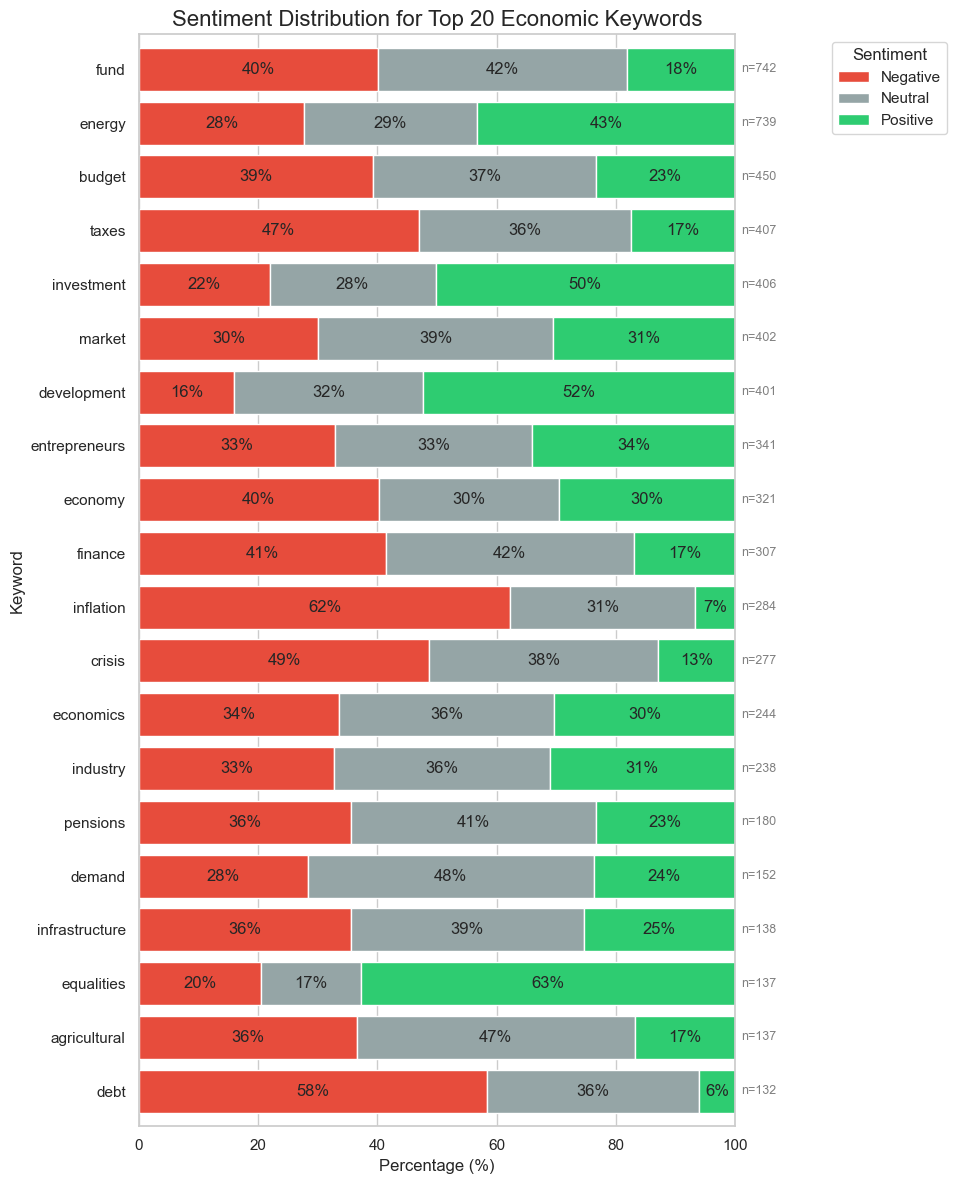


Most Positive Keywords:
final_sentiment_label       Positive  total_count
matched_keywords_FILTERED                        
equalities                 62.773723          137
development                52.369077          401
investment                 50.246305          406
energy                     43.301759          739
entrepreneurs              34.017595          341

Most Negative Keywords:
final_sentiment_label       Negative  total_count
matched_keywords_FILTERED                        
inflation                  62.323944          284
debt                       58.333333          132
crisis                     48.736462          277
taxes                      46.928747          407
finance                    41.368078          307
------------------------------------------------------------


In [53]:
# Purpose: Analyzes which economic keywords are associated with positive/negative sentiment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*60)
print("--- Keyword Sentiment Analysis ---")
print("="*60)

# Configuration
TOP_N_KEYWORDS = 20
MIN_KEYWORD_COUNT = 10  # Minimum occurrences to include keyword

if 'df_sentiment_results' in locals() and 'matched_keywords_FILTERED' in df_sentiment_results.columns:
    try:
        # Prepare data
        df_keywords = df_sentiment_results[['matched_keywords_FILTERED', 'final_sentiment_label']].copy()
        df_keywords = df_keywords.dropna(subset=['matched_keywords_FILTERED'])
        
        # Ensure keywords are lists
        if isinstance(df_keywords['matched_keywords_FILTERED'].iloc[0], str):
            import ast
            df_keywords['matched_keywords_FILTERED'] = df_keywords['matched_keywords_FILTERED'].apply(
                lambda x: ast.literal_eval(x) if x.startswith('[') else x.split()
            )
        
        # Explode keywords
        df_exploded = df_keywords.explode('matched_keywords_FILTERED')
        df_exploded = df_exploded[df_exploded['matched_keywords_FILTERED'] != '']
        
        print(f"Total keyword occurrences: {len(df_exploded):,}")
        
        # Get top keywords
        keyword_counts = df_exploded['matched_keywords_FILTERED'].value_counts()
        top_keywords = keyword_counts[keyword_counts >= MIN_KEYWORD_COUNT].head(TOP_N_KEYWORDS).index
        
        # Filter to top keywords
        df_top = df_exploded[df_exploded['matched_keywords_FILTERED'].isin(top_keywords)]
        
        # Calculate sentiment distribution
        sentiment_dist = df_top.groupby(['matched_keywords_FILTERED', 'final_sentiment_label']).size().unstack(fill_value=0)
        sentiment_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100
        
        # Add total count for sorting
        sentiment_pct['total_count'] = sentiment_dist.sum(axis=1)
        sentiment_pct = sentiment_pct.sort_values('total_count', ascending=True)  # Ascending for horizontal bars
        
        # Create horizontal bar chart
        fig, ax = plt.subplots(figsize=(10, 12))
        
        # Plot stacked bars
        colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
        sentiment_cols = [col for col in ['Negative', 'Neutral', 'Positive'] if col in sentiment_pct.columns]
        
        sentiment_pct[sentiment_cols].plot(kind='barh', stacked=True, ax=ax,
                                          color=[colors[col] for col in sentiment_cols],
                                          width=0.8)
        
        # Add count labels on the right
        for idx, (keyword, row) in enumerate(sentiment_pct.iterrows()):
            ax.text(101, idx, f"n={int(row['total_count'])}", 
                   va='center', fontsize=9, color='gray')
        
        # Formatting
        ax.set_title(f'Sentiment Distribution for Top {TOP_N_KEYWORDS} Economic Keywords', fontsize=16)
        ax.set_xlabel('Percentage (%)')
        ax.set_ylabel('Keyword')
        ax.set_xlim(0, 100)
        ax.legend(title='Sentiment', bbox_to_anchor=(1.15, 1), loc='upper left')
        
        # Add percentage labels in bars
        for container in ax.containers[:3]:  # Only first 3 containers (sentiments)
            labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels, label_type='center')
        
        plt.tight_layout()
        plt.show()
        
        # Print keywords with highest positive/negative bias
        print("\nMost Positive Keywords:")
        if 'Positive' in sentiment_pct.columns:
            print(sentiment_pct.nlargest(5, 'Positive')[['Positive', 'total_count']])
        
        print("\nMost Negative Keywords:")
        if 'Negative' in sentiment_pct.columns:
            print(sentiment_pct.nlargest(5, 'Negative')[['Negative', 'total_count']])
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

print("-" * 60)

##### 11. Party Sentiment Distribution - Before vs After Election


--- Party Sentiment: Before vs After Election ---


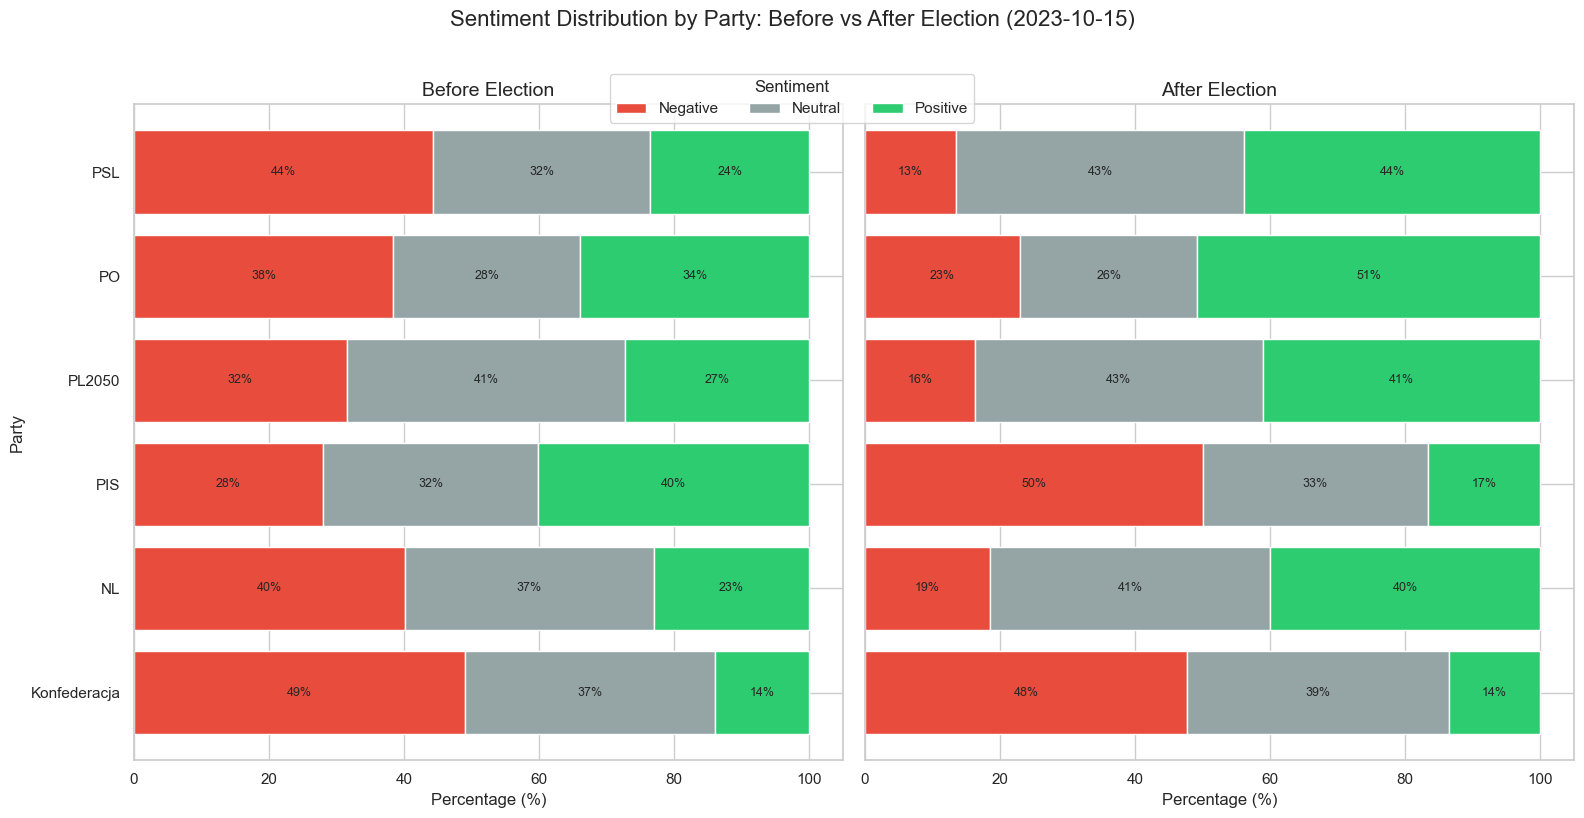

In [54]:
# Purpose: Shows sentiment proportions for each party in two time periods
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "="*60)
print("--- Party Sentiment: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
TOP_N_PARTIES = 8

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_period = df_sentiment_results.copy()
        df_period['created_at'] = pd.to_datetime(df_period['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period column
        df_period['period'] = df_period['created_at'].apply(
            lambda x: 'Before' if x < election_date else 'After'
        )
        
        # Get top parties
        top_parties = df_period['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Calculate proportions
        party_period_sentiment = df_period[df_period['party'].isin(top_parties)].groupby(
            ['party', 'period', 'final_sentiment_label']
        ).size().unstack(fill_value=0)
        
        party_period_sentiment_pct = party_period_sentiment.div(
            party_period_sentiment.sum(axis=1), axis=0
        ) * 100
        
        # Create subplots for Before and After
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
        
        colors = {'Negative': '#e74c3c', 'Neutral': '#95a5a6', 'Positive': '#2ecc71'}
        
        # Before Election
        before_data = party_period_sentiment_pct.loc[
            party_period_sentiment_pct.index.get_level_values('period') == 'Before'
        ]
        if not before_data.empty:
            before_data = before_data.droplevel('period')
            before_data.plot(kind='barh', stacked=True, ax=ax1,
                           color=[colors.get(col, '#333') for col in before_data.columns],
                           width=0.8, legend=False)
            ax1.set_title('Before Election', fontsize=14)
            ax1.set_xlabel('Percentage (%)')
            ax1.set_ylabel('Party')
            
            # Add labels
            for container in ax1.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax1.bar_label(container, labels=labels, label_type='center', fontsize=9)
        
        # After Election
        after_data = party_period_sentiment_pct.loc[
            party_period_sentiment_pct.index.get_level_values('period') == 'After'
        ]
        if not after_data.empty:
            after_data = after_data.droplevel('period')
            after_data.plot(kind='barh', stacked=True, ax=ax2,
                          color=[colors.get(col, '#333') for col in after_data.columns],
                          width=0.8, legend=False)
            ax2.set_title('After Election', fontsize=14)
            ax2.set_xlabel('Percentage (%)')
            
            # Add labels
            for container in ax2.containers:
                labels = [f'{v:.0f}%' if v > 5 else '' for v in container.datavalues]
                ax2.bar_label(container, labels=labels, label_type='center', fontsize=9)
        
        # Add central legend
        handles, labels = ax1.get_legend_handles_labels()
        fig.legend(handles, labels, title='Sentiment', loc='upper center', 
                  bbox_to_anchor=(0.5, 0.95), ncol=3)
        
        plt.suptitle(f'Sentiment Distribution by Party: Before vs After Election ({ELECTION_DATE})', 
                    fontsize=16, y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 12. Top Keywords Sentiment Analysis by Party (Heatmap)


--- Top Keywords Sentiment by Party ---


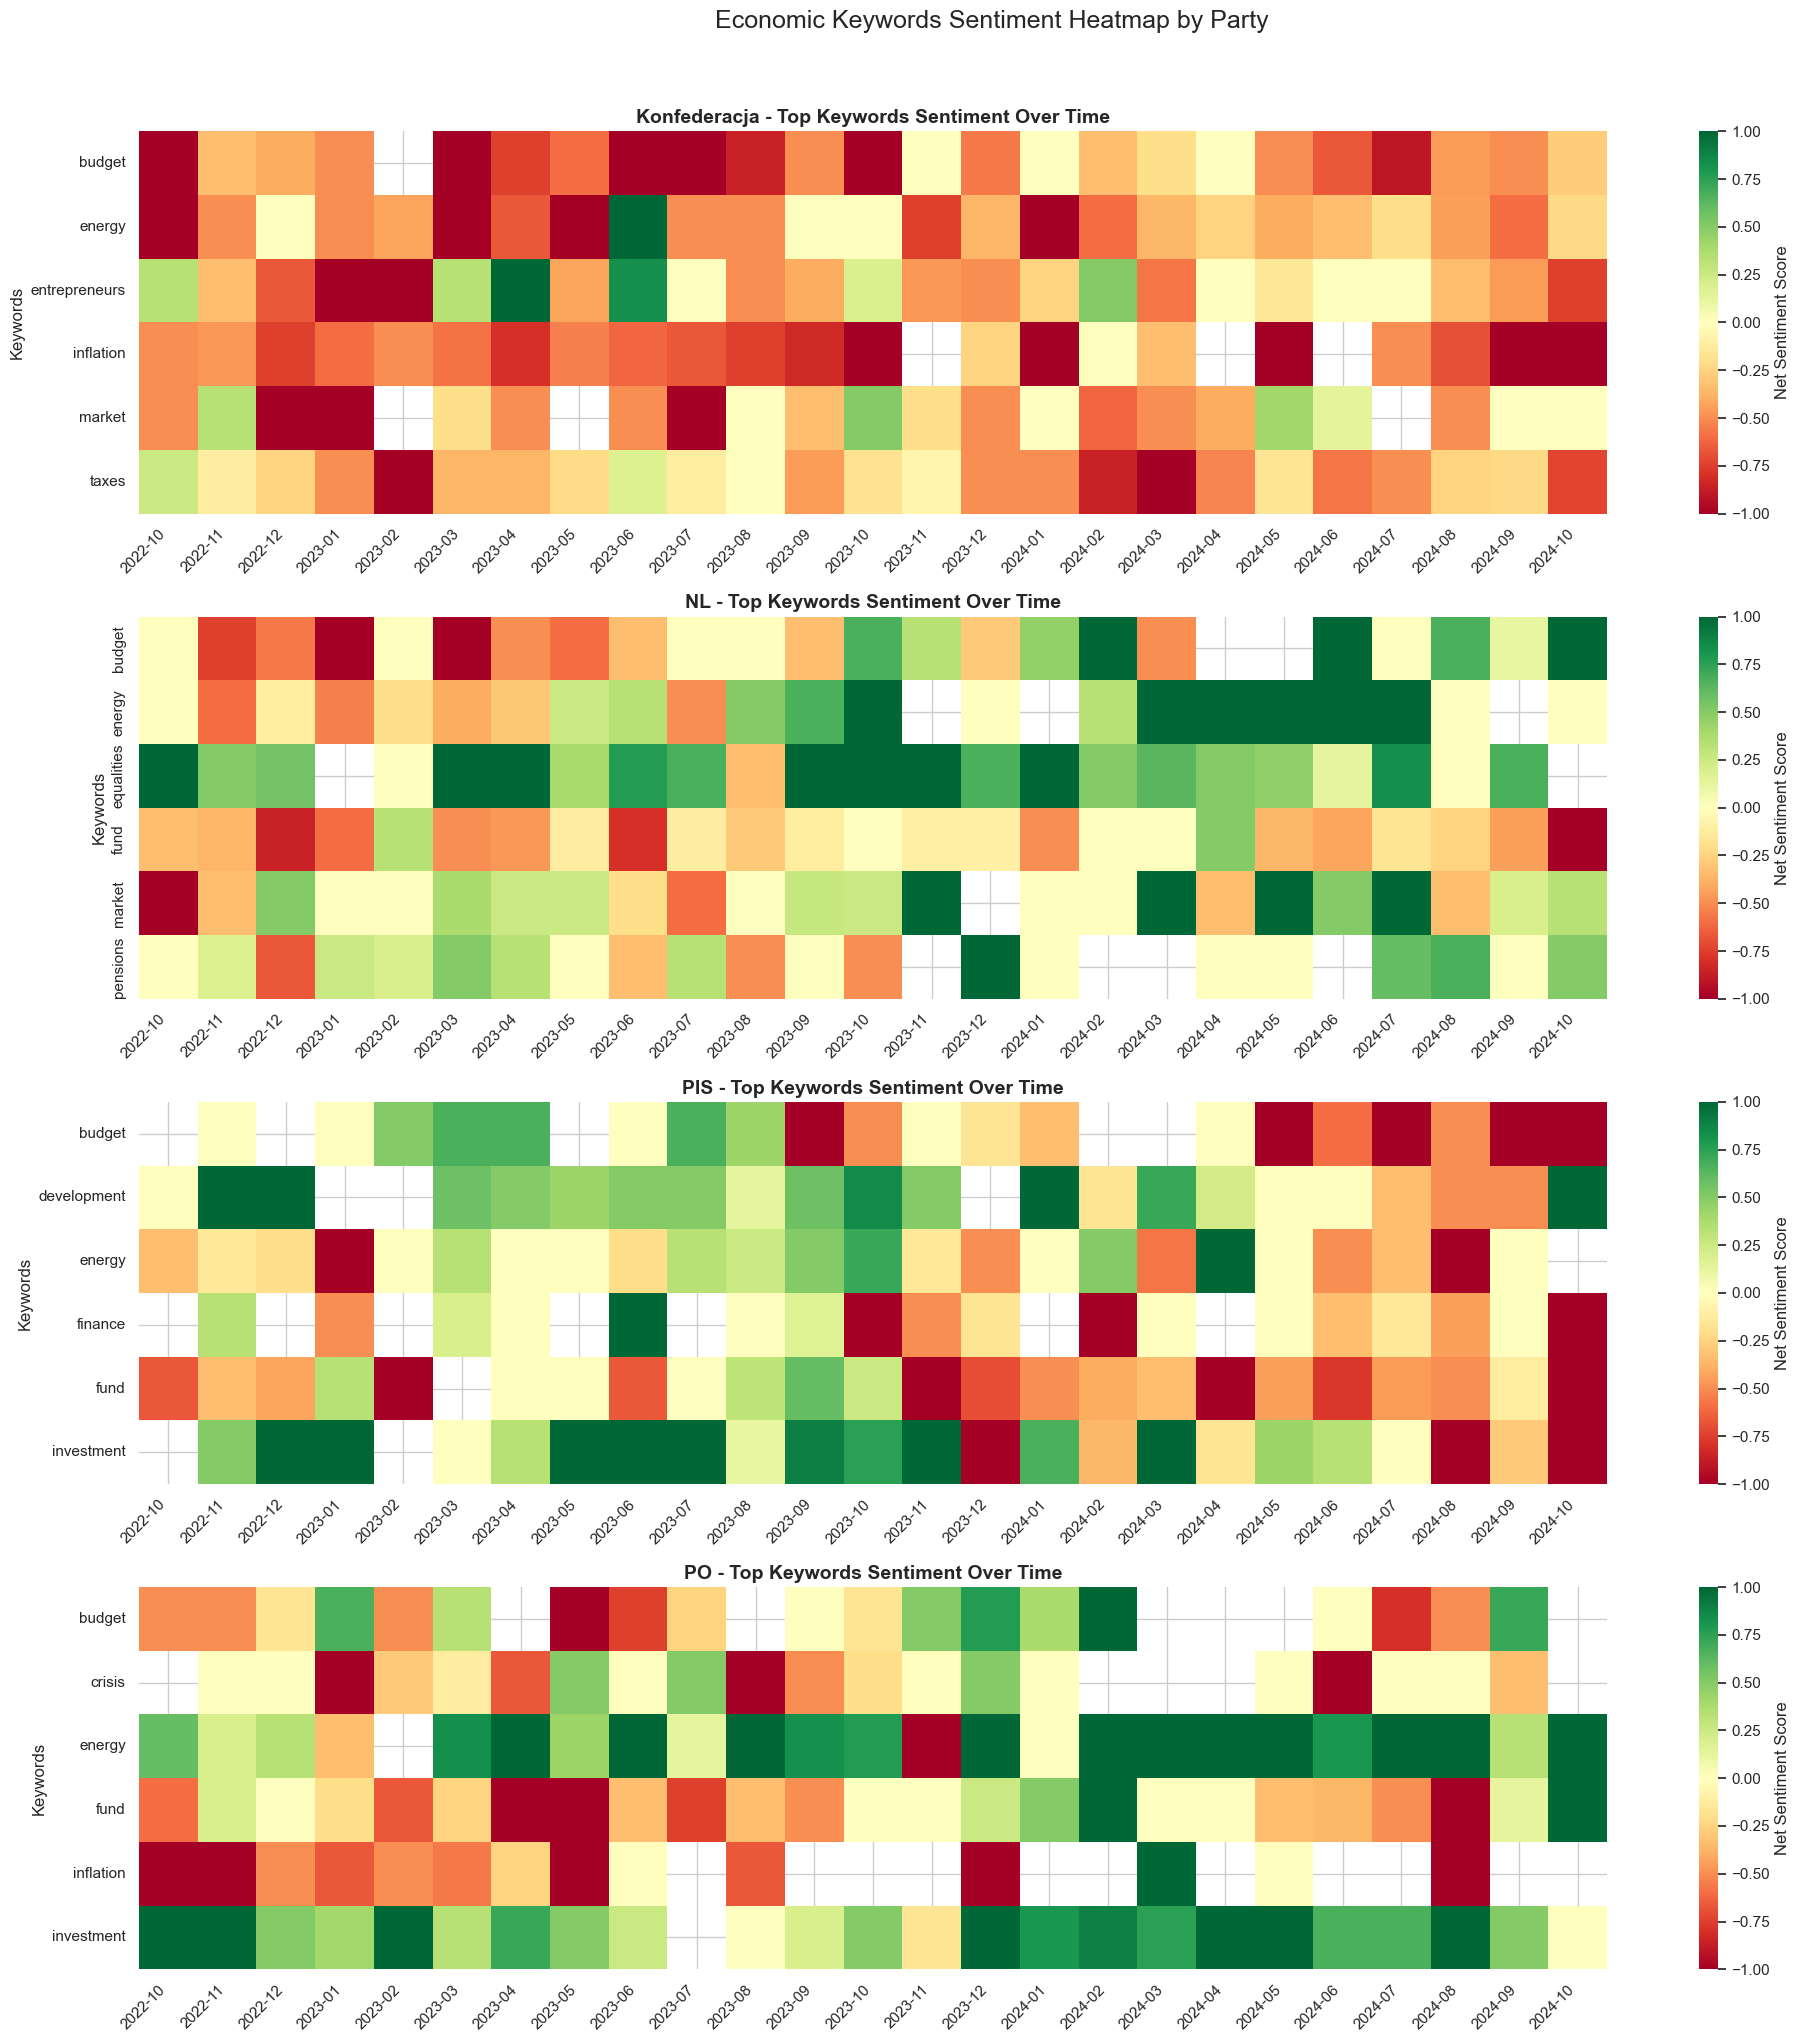

In [55]:
# Purpose: Shows sentiment patterns for most discussed economic terms within each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("\n" + "="*60)
print("--- Top Keywords Sentiment by Party ---")
print("="*60)

# Configuration
TOP_N_KEYWORDS_PER_PARTY = 6
TOP_N_PARTIES = 4
TIME_FREQUENCY = 'ME'  # Monthly for cleaner visualization

if 'df_sentiment_results' in locals() and all(col in df_sentiment_results.columns for col in 
    ['matched_keywords_FILTERED', 'final_sentiment_label', 'party', 'created_at']):
    try:
        # Prepare data
        df_analysis = df_sentiment_results.copy()
        df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
        
        # Get top parties
        top_parties = df_analysis['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Create figure for all parties
        fig = plt.figure(figsize=(20, 5 * TOP_N_PARTIES))
        
        for party_idx, party in enumerate(top_parties):
            # Get party data
            party_data = df_analysis[df_analysis['party'] == party]
            
            # Extract all keywords for this party
            all_keywords = []
            for keywords_list in party_data['matched_keywords_FILTERED'].dropna():
                if isinstance(keywords_list, list):
                    all_keywords.extend(keywords_list)
            
            # Get top keywords
            keyword_counts = Counter(all_keywords)
            top_keywords = [kw for kw, _ in keyword_counts.most_common(TOP_N_KEYWORDS_PER_PARTY)]
            
            # Create subplot for this party
            ax = plt.subplot(TOP_N_PARTIES, 1, party_idx + 1)
            
            # Prepare data for heatmap
            heatmap_data = []
            
            for keyword in top_keywords:
                # Filter data for this keyword
                keyword_data = party_data[party_data['matched_keywords_FILTERED'].apply(
                    lambda x: isinstance(x, list) and keyword in x
                )]
                
                if not keyword_data.empty:
                    # Group by time and calculate sentiment percentages
                    time_sentiment = keyword_data.groupby([
                        pd.Grouper(key='created_at', freq=TIME_FREQUENCY),
                        'final_sentiment_label'
                    ]).size().unstack(fill_value=0)
                    
                    # Calculate net sentiment score for each time period
                    time_sentiment['net_score'] = (
                        (time_sentiment.get('Positive', 0) - time_sentiment.get('Negative', 0)) / 
                        time_sentiment.sum(axis=1).replace(0, 1)
                    )
                    
                    # Add to heatmap data
                    for date, score in time_sentiment['net_score'].items():
                        heatmap_data.append({
                            'keyword': keyword,
                            'date': date,
                            'net_score': score
                        })
            
            # Create heatmap
            if heatmap_data:
                heatmap_df = pd.DataFrame(heatmap_data)
                pivot_data = heatmap_df.pivot(index='keyword', columns='date', values='net_score')
                
                # Plot heatmap
                sns.heatmap(pivot_data, 
                           cmap='RdYlGn', center=0, vmin=-1, vmax=1,
                           cbar_kws={'label': 'Net Sentiment Score'},
                           ax=ax, 
                           xticklabels=True,
                           yticklabels=True)
                
                # Format x-axis dates
                date_labels = [d.strftime('%Y-%m') for d in pivot_data.columns]
                ax.set_xticklabels(date_labels, rotation=45, ha='right')
                
                ax.set_title(f'{party} - Top Keywords Sentiment Over Time', fontsize=14, fontweight='bold')
                ax.set_xlabel('')
                ax.set_ylabel('Keywords')
            else:
                ax.text(0.5, 0.5, f'No data for {party}', ha='center', va='center', 
                       transform=ax.transAxes)
                ax.set_title(f'{party}', fontsize=14, fontweight='bold')
        
        plt.suptitle('Economic Keywords Sentiment Heatmap by Party', fontsize=18, y=1.02)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 13. Calculate and Plot Percentage Sentiment Change (Before vs After Election)


--- Sentiment Change Analysis: Before vs After Election ---

Sentiment Changes by Party:
--------------------------------------------------------------------------------

Konfederacja:
  Positive: 100 → 132 (+32.0%)
  Negative: 352 → 464 (+31.8%)
  Neutral: 266 → 377 (+41.7%)

NL:
  Positive: 163 → 203 (+24.5%)
  Negative: 284 → 94 (-66.9%)
  Neutral: 261 → 210 (-19.5%)

PIS:
  Positive: 166 → 81 (-51.2%)
  Negative: 116 → 244 (+110.3%)
  Neutral: 132 → 163 (+23.5%)

PL2050:
  Positive: 101 → 157 (+55.4%)
  Negative: 117 → 62 (-47.0%)
  Neutral: 153 → 163 (+6.5%)

PO:
  Positive: 170 → 166 (-2.4%)
  Negative: 193 → 75 (-61.1%)
  Neutral: 139 → 86 (-38.1%)

PSL:
  Positive: 94 → 124 (+31.9%)
  Negative: 177 → 38 (-78.5%)
  Neutral: 129 → 121 (-6.2%)


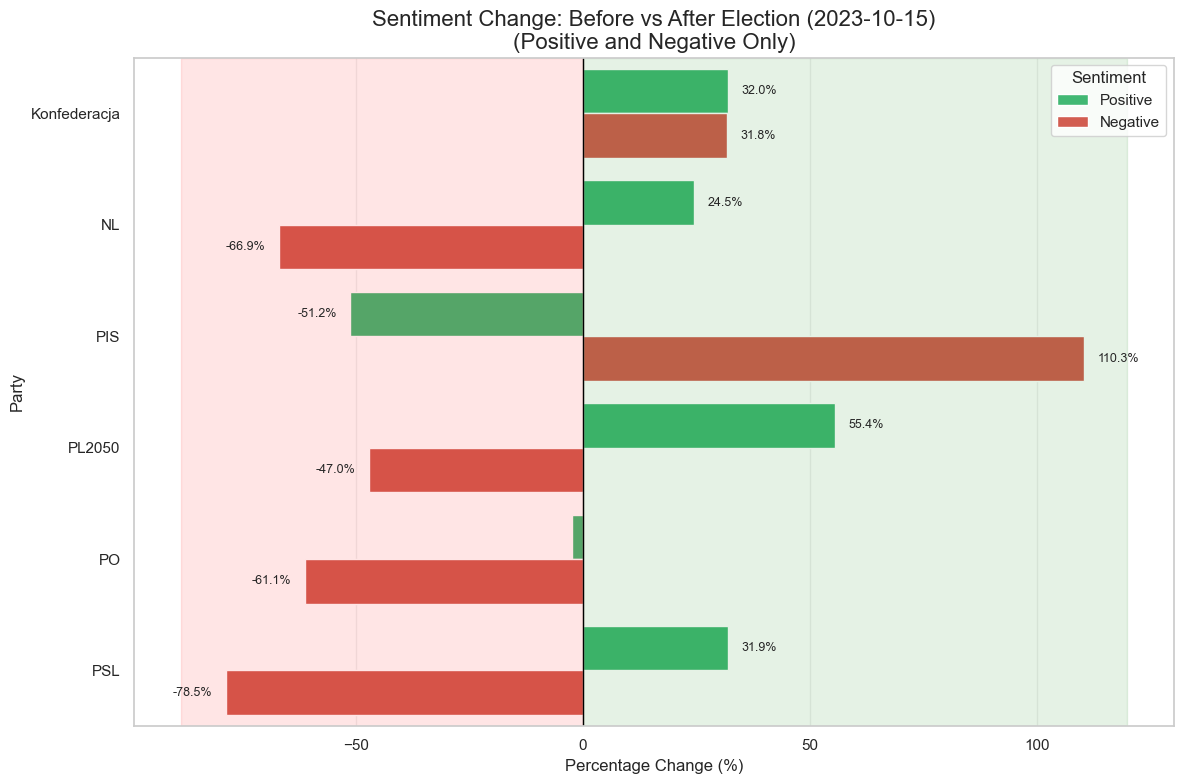

In [56]:
# Purpose: Shows how sentiment changed after the election for each party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("--- Sentiment Change Analysis: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
PARTY_COL = 'party'

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_analysis = df_sentiment_results.copy()
        df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period column
        df_analysis['period'] = df_analysis['created_at'].apply(
            lambda x: 'Before Election' if x < election_date else 'After Election'
        )
        
        # Calculate sentiment counts by party and period
        sentiment_counts = df_analysis.groupby([PARTY_COL, 'period', 'final_sentiment_label']).size().unstack(fill_value=0)
        
        # Calculate percentage change
        results = []
        
        for party in sentiment_counts.index.get_level_values(PARTY_COL).unique():
            party_data = sentiment_counts.loc[party]
            
            if len(party_data) == 2:  # Has both before and after data
                before = party_data.loc['Before Election']
                after = party_data.loc['After Election']
                
                for sentiment in ['Positive', 'Negative', 'Neutral']:
                    if sentiment in before.index and sentiment in after.index:
                        before_count = before[sentiment]
                        after_count = after[sentiment]
                        
                        # Calculate percentage change
                        if before_count > 0:
                            pct_change = ((after_count - before_count) / before_count) * 100
                        else:
                            pct_change = 100 if after_count > 0 else 0
                        
                        results.append({
                            'Party': party,
                            'Sentiment': sentiment,
                            'Before': before_count,
                            'After': after_count,
                            'Pct_Change': pct_change
                        })
        
        # Create DataFrame from results
        df_changes = pd.DataFrame(results)
        
        # Print summary table
        print("\nSentiment Changes by Party:")
        print("-" * 80)
        for party in df_changes['Party'].unique():
            print(f"\n{party}:")
            party_changes = df_changes[df_changes['Party'] == party]
            for _, row in party_changes.iterrows():
                print(f"  {row['Sentiment']}: {row['Before']} → {row['After']} ({row['Pct_Change']:+.1f}%)")
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Filter for Positive and Negative only for cleaner visualization
        df_plot = df_changes[df_changes['Sentiment'].isin(['Positive', 'Negative'])]
        
        # Create grouped bar chart
        bar_plot = sns.barplot(data=df_plot, 
                              y='Party', 
                              x='Pct_Change',
                              hue='Sentiment',
                              palette={'Positive': '#2ecc71', 'Negative': '#e74c3c'},
                              orient='h')
        
        # Add zero line
        ax.axvline(0, color='black', linewidth=1, linestyle='-')
        
        # Formatting
        ax.set_xlabel('Percentage Change (%)', fontsize=12)
        ax.set_ylabel('Party', fontsize=12)
        ax.set_title(f'Sentiment Change: Before vs After Election ({ELECTION_DATE})\n(Positive and Negative Only)', 
                    fontsize=16)
        
        # Add value labels
        for p in ax.patches:
            width = p.get_width()
            if abs(width) > 5:  # Only show label if change is significant
                ax.text(width + (3 if width > 0 else -3),
                       p.get_y() + p.get_height()/2,
                       f'{width:.1f}%',
                       ha='left' if width > 0 else 'right',
                       va='center',
                       fontsize=9)
        
        # Color background
        ax.axvspan(0, ax.get_xlim()[1], alpha=0.1, color='green')
        ax.axvspan(ax.get_xlim()[0], 0, alpha=0.1, color='red')
        
        ax.legend(title='Sentiment', loc='best')
        ax.grid(axis='x', alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 14. Combined Positive/Negative Before vs After Election


--- Positive/Negative Balance: Before vs After Election ---


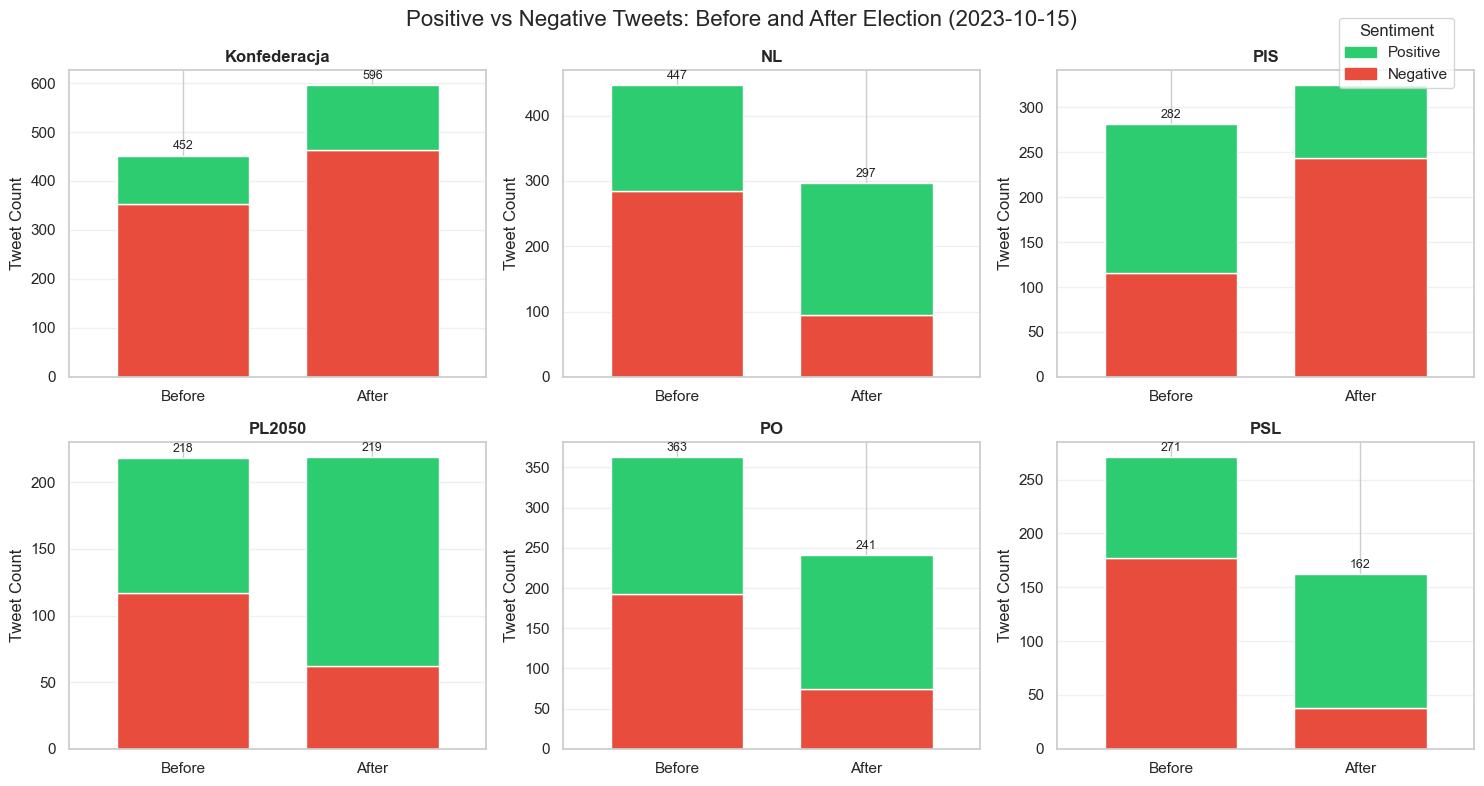

In [59]:
# Purpose: Focus on sentiment polarity changes excluding neutral
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*60)
print("--- Positive/Negative Balance: Before vs After Election ---")
print("="*60)

# Configuration
ELECTION_DATE = '2023-10-15'
TOP_N_PARTIES = 9

if 'df_sentiment_results' in locals():
    try:
        # Prepare data
        df_comp = df_sentiment_results.copy()
        df_comp['created_at'] = pd.to_datetime(df_comp['created_at'], utc=True)
        election_date = pd.to_datetime(ELECTION_DATE, utc=True)
        
        # Add period
        df_comp['Period'] = df_comp['created_at'].apply(
            lambda x: 'Before' if x < election_date else 'After'
        )
        
        # Filter for Positive and Negative only
        df_comp_filtered = df_comp[df_comp['final_sentiment_label'].isin(['Positive', 'Negative'])]
        
        # Get top parties
        top_parties = df_comp['party'].value_counts().head(TOP_N_PARTIES).index
        
        # Calculate counts
        comparison_counts = df_comp_filtered[df_comp_filtered['party'].isin(top_parties)].groupby(
            ['party', 'Period', 'final_sentiment_label']
        ).size().reset_index(name='count')
        
        # Create faceted plot
        parties = sorted(comparison_counts['party'].unique())
        num_cols = 3
        num_rows = (len(parties) + num_cols - 1) // num_cols
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows), sharey=False)
        if num_rows == 1:
            axes = axes.reshape(1, -1)
        axes = axes.flatten()
        
        colors = {'Positive': '#2ecc71', 'Negative': '#e74c3c'}
        
        for i, party in enumerate(parties):
            ax = axes[i]
            party_data = comparison_counts[comparison_counts['party'] == party]
            
            # Pivot data
            pivot_df = party_data.pivot_table(
                index='Period', 
                columns='final_sentiment_label',
                values='count', 
                fill_value=0
            )
            
            # Ensure order
            pivot_df = pivot_df.reindex(['Before', 'After'], fill_value=0)
            
            # Plot stacked bars
            pivot_df.plot(kind='bar', stacked=True, ax=ax,
                         color=[colors.get(col, 'gray') for col in pivot_df.columns],
                         width=0.7, legend=False)
            
            ax.set_title(party, fontsize=12, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Tweet Count')
            ax.tick_params(axis='x', rotation=0)
            ax.grid(axis='y', alpha=0.3)
            
            # Add total count on top of bars
            for j, (idx, row) in enumerate(pivot_df.iterrows()):
                total = row.sum()
                ax.text(j, total + ax.get_ylim()[1]*0.01, 
                       f'{int(total)}', ha='center', va='bottom', fontsize=9)
        
        # Remove empty subplots
        for j in range(len(parties), len(axes)):
            fig.delaxes(axes[j])
        
        # Add legend
        handles = [plt.Rectangle((0,0),1,1, color=colors[s]) for s in ['Positive', 'Negative']]
        fig.legend(handles, ['Positive', 'Negative'], title='Sentiment',
                  loc='upper right', bbox_to_anchor=(0.98, 0.98))
        
        plt.suptitle(f'Positive vs Negative Tweets: Before and After Election ({ELECTION_DATE})',
                    fontsize=16, y=0.98)
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {e}")
        import traceback
        traceback.print_exc()

##### 15. Average Sentiment Score for Top Keywords by Party

In [49]:
# # Purpose: Shows sentiment trends for key economic terms with event annotations
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from collections import Counter

# print("\n" + "="*60)
# print("--- Average Sentiment Score for Keywords by Party ---")
# print("="*60)

# # Configuration
# TOP_N_KEYWORDS_PER_PARTY = 6
# TIME_FREQUENCY = 'W'  # Weekly for detailed trends
# SHOW_ANNOTATIONS = True

# # Event annotations
# EVENTS = [
#     {'date': '2023-10-15', 'label': 'PL Election', 'color': 'red'},
#     {'date': '2024-06-09', 'label': 'EP Election', 'color': 'blue'},
# ]

# # Sentiment score mapping
# SENTIMENT_SCORES = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

# if 'df_sentiment_results' in locals() and all(col in df_sentiment_results.columns for col in 
#     ['matched_keywords_FILTERED', 'final_sentiment_label', 'party', 'created_at']):
#     try:
#         # Prepare data
#         df_analysis = df_sentiment_results.copy()
#         df_analysis['created_at'] = pd.to_datetime(df_analysis['created_at'], utc=True)
#         df_analysis['sentiment_score'] = df_analysis['final_sentiment_label'].map(SENTIMENT_SCORES)
        
#         # Get top parties
#         top_parties = df_analysis['party'].value_counts().head(4).index
        
#         for party in top_parties:
#             print(f"\n=== Processing {party} ===")
            
#             # Get party data
#             party_data = df_analysis[df_analysis['party'] == party]
            
#             # Extract keywords
#             all_keywords = []
#             for keywords_list in party_data['matched_keywords_FILTERED'].dropna():
#                 if isinstance(keywords_list, list):
#                     all_keywords.extend(keywords_list)
            
#             # Get top keywords
#             keyword_counts = Counter(all_keywords)
#             top_keywords = [kw for kw, _ in keyword_counts.most_common(TOP_N_KEYWORDS_PER_PARTY)]
            
#             if not top_keywords:
#                 continue
            
#             # Create subplots
#             num_cols = min(3, len(top_keywords))
#             num_rows = (len(top_keywords) + num_cols - 1) // num_cols
            
#             fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5*num_rows),
#                                    sharex=True, sharey=True)
            
#             if num_rows == 1:
#                 axes = axes.reshape(1, -1)
#             axes = axes.flatten()
            
#             # Plot each keyword
#             for idx, keyword in enumerate(top_keywords):
#                 ax = axes[idx]
                
#                 # Filter data for keyword
#                 keyword_data = party_data[party_data['matched_keywords_FILTERED'].apply(
#                     lambda x: isinstance(x, list) and keyword in x
#                 )]
                
#                 if not keyword_data.empty:
#                     # Calculate average sentiment over time
#                     avg_sentiment = keyword_data.groupby(
#                         pd.Grouper(key='created_at', freq=TIME_FREQUENCY)
#                     )['sentiment_score'].mean()
                    
#                     # Plot line
#                     ax.plot(avg_sentiment.index, avg_sentiment.values,
#                            color='black', linewidth=2, marker='o', markersize=4)
                    
#                     # Fill areas
#                     ax.fill_between(avg_sentiment.index, avg_sentiment.values, 0,
#                                    where=(avg_sentiment.values >= 0),
#                                    color='green', alpha=0.3, interpolate=True)
#                     ax.fill_between(avg_sentiment.index, avg_sentiment.values, 0,
#                                    where=(avg_sentiment.values < 0),
#                                    color='red', alpha=0.3, interpolate=True)
                    
#                     # Add zero line
#                     ax.axhline(0, color='gray', linestyle='--', linewidth=1)
                    
#                     # Add annotations
#                     if SHOW_ANNOTATIONS:
#                         for event in EVENTS:
#                             event_date = pd.to_datetime(event['date'], utc=True)
#                             if avg_sentiment.index.min() <= event_date <= avg_sentiment.index.max():
#                                 ax.axvline(event_date, color=event['color'], 
#                                          linestyle='--', alpha=0.7, linewidth=1)
                    
#                     # Formatting
#                     ax.set_title(f"'{keyword}'", fontsize=12, fontweight='bold')
#                     ax.set_ylim(-1.1, 1.1)
#                     ax.grid(True, alpha=0.3)
#                     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
                    
#                     # Add sample size
#                     total_tweets = len(keyword_data)
#                     ax.text(0.02, 0.98, f'n={total_tweets}', 
#                            transform=ax.transAxes, va='top', fontsize=9, color='gray')
                
#                 else:
#                     ax.text(0.5, 0.5, 'No data', ha='center', va='center',
#                            transform=ax.transAxes)
#                     ax.set_title(f"'{keyword}'", fontsize=12)
            
#             # Remove empty subplots
#             for idx in range(len(top_keywords), len(axes)):
#                 fig.delaxes(axes[idx])
            
#             # Set common labels
#             fig.text(0.5, 0.02, 'Date', ha='center', fontsize=12)
#             fig.text(0.02, 0.5, 'Average Sentiment Score', va='center', rotation='vertical', fontsize=12)
            
#             plt.suptitle(f'{party} - Average Sentiment for Top Keywords\n(+1 = Positive, 0 = Neutral, -1 = Negative)', 
#                         fontsize=16)
            
#             # Rotate x labels
#             for ax in axes[:len(top_keywords)]:
#                 plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
            
#             plt.tight_layout()
#             plt.show()
            
#     except Exception as e:
#         print(f"Error: {e}")
#         import traceback
#         traceback.print_exc()

Sentiment codes done, full economic words analysis is done.